# Diamonds_XGboost_CV_AllKnown_BalancedData_Stat-diff_Metrics_Top5Craton_Predict_Unknown
By Vivian Zeng       01/25/2021

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, r2_score, make_scorer, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

import pickle

In [2]:
#ls

In [3]:
df_raw = pd.read_csv("Diamind_XZ_20201215_AllKnown.csv")
df_raw.head()

,Unnamed: 0,craton,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace,NAs
0,1,Amazonia,0.000000,30.353616,0.008470,0.027368,0.0,0.363968,0.270,0.017143,0.0,0.0,0.023741,0.0,0.026553,37.022328,0.0,0.037718,0.0,0.0,136.0,79.0,31.0,0.2,0.300,27.4,335.0,4.00,0.600,2.100,0.60,0.192,0.0760,0.1472,0.224,0.1000,NaN,NaN,NaN,55.640,2706.0,NaN,48
1,2,Amazonia,0.014000,32.007960,0.047646,0.027368,0.0,0.394944,0.342,0.028572,0.0,0.0,0.023741,0.0,0.033192,33.281206,0.0,0.094296,0.0,0.0,260.0,56.0,181.0,0.4,0.800,56.6,227.0,3.20,0.700,2.400,2.50,0.312,0.1112,0.1288,0.392,0.3280,NaN,NaN,NaN,97.424,3251.0,NaN,48
2,3,Amazonia,0.070000,0.689310,1.138210,2.155230,0.0,0.201344,29.868,0.017143,0.0,0.0,0.023741,0.0,0.026553,36.368993,0.0,0.809374,0.0,0.0,4172.0,429.0,6375.0,1.6,0.144,25.2,4.8,0.56,0.096,0.056,0.32,0.400,0.1600,0.3200,0.640,0.3200,NaN,NaN,NaN,156.800,1887.0,NaN,48
3,4,Amazonia,0.004667,30.101868,0.008470,0.027368,0.0,0.565312,0.072,0.021429,0.0,0.0,0.023741,0.0,0.026553,35.941214,0.0,0.037718,0.0,0.0,2944.0,155.0,790.0,0.2,0.300,348.7,646.0,2.30,0.500,1.900,0.70,0.300,0.0688,0.1864,0.248,0.1544,NaN,NaN,NaN,71.488,2397.0,NaN,48
4,5,Amazonia,0.028000,32.463504,0.068822,0.027368,0.0,0.325248,0.300,0.017143,0.0,0.0,0.023741,0.0,0.026553,31.290089,0.0,0.055006,0.0,0.0,153.0,53.0,13.0,0.3,0.500,68.7,205.0,8.80,0.800,2.900,0.70,0.100,0.0000,0.1000,0.256,0.5000,NaN,NaN,NaN,67.304,2898.0,NaN,48


### Data Preprocessing

In [4]:
df = df_raw.copy()
df.shape

(2144, 43)

In [5]:
df.columns #Keep NA to see NA's impact

Index(['Unnamed: 0', 'craton', 'Si', 'Ti', 'Al', 'Cr', 'V', 'Mn', 'Mg', 'Ca',
       'Sr', 'Ba', 'Na', 'P', 'K', 'Fe', 'Co', 'Ni', 'S', 'Zn', 'Cr_trace',
       'Co_trace', 'Ni_trace', 'Sr_trace', 'Y_trace', 'Zr_trace', 'Nb_trace',
       'Ba_trace', 'La_trace', 'Ce_trace', 'Nd_trace', 'Sm_trace', 'Eu_trace',
       'Dy_trace', 'Er_trace', 'Yb_trace', 'Ti_trace', 'Fe_trace', 'Al_trace',
       'Ca_trace', 'Mn_trace', 'Mg_trace', 'NAs'],
      dtype='object')

In [6]:
df.drop(df.columns[df.isna().mean() == 1], axis=1, inplace=True)  # Remove columns that 100% missing 
df.shape

(2144, 43)

In [7]:
df=df.drop(df.columns[0], axis=1)

In [8]:
df=df.drop('NAs', axis=1)

In [9]:
df.head()

,craton,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace
0,Amazonia,0.000000,30.353616,0.008470,0.027368,0.0,0.363968,0.270,0.017143,0.0,0.0,0.023741,0.0,0.026553,37.022328,0.0,0.037718,0.0,0.0,136.0,79.0,31.0,0.2,0.300,27.4,335.0,4.00,0.600,2.100,0.60,0.192,0.0760,0.1472,0.224,0.1000,NaN,NaN,NaN,55.640,2706.0,NaN
1,Amazonia,0.014000,32.007960,0.047646,0.027368,0.0,0.394944,0.342,0.028572,0.0,0.0,0.023741,0.0,0.033192,33.281206,0.0,0.094296,0.0,0.0,260.0,56.0,181.0,0.4,0.800,56.6,227.0,3.20,0.700,2.400,2.50,0.312,0.1112,0.1288,0.392,0.3280,NaN,NaN,NaN,97.424,3251.0,NaN
2,Amazonia,0.070000,0.689310,1.138210,2.155230,0.0,0.201344,29.868,0.017143,0.0,0.0,0.023741,0.0,0.026553,36.368993,0.0,0.809374,0.0,0.0,4172.0,429.0,6375.0,1.6,0.144,25.2,4.8,0.56,0.096,0.056,0.32,0.400,0.1600,0.3200,0.640,0.3200,NaN,NaN,NaN,156.800,1887.0,NaN
3,Amazonia,0.004667,30.101868,0.008470,0.027368,0.0,0.565312,0.072,0.021429,0.0,0.0,0.023741,0.0,0.026553,35.941214,0.0,0.037718,0.0,0.0,2944.0,155.0,790.0,0.2,0.300,348.7,646.0,2.30,0.500,1.900,0.70,0.300,0.0688,0.1864,0.248,0.1544,NaN,NaN,NaN,71.488,2397.0,NaN
4,Amazonia,0.028000,32.463504,0.068822,0.027368,0.0,0.325248,0.300,0.017143,0.0,0.0,0.023741,0.0,0.026553,31.290089,0.0,0.055006,0.0,0.0,153.0,53.0,13.0,0.3,0.500,68.7,205.0,8.80,0.800,2.900,0.70,0.100,0.0000,0.1000,0.256,0.5000,NaN,NaN,NaN,67.304,2898.0,NaN


In [10]:
df.craton.value_counts()

Siberia                 695
Kaapvaal                410
Slave                   330
Amazonia                207
Congo                   101
West Africa              98
Superior                 86
Guyana                   57
Alluvial                 38
Wyoming                  35
Zimbabwe                 28
Gawler                   17
Tarim                    12
East European            10
Pohorje                  10
Buffalo Head Terrane      6
Kalahari                  4
Name: craton, dtype: int64

In [11]:
df.craton.nunique()

17

In [12]:
df_top5= df[df.craton.isin(['Siberia','Kaapvaal','Slave','Amazonia', 'Congo'])]

In [13]:
df_top5.shape

(1743, 41)

In [ ]:
def feature_ratios(df,feature):
    plt.figure(figsize=(20, 16))
    sns.countplot(df.feature, palette="Set3")
    plt.xticks(rotation=45)

In [15]:
df.head()

,craton,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace
0,Amazonia,0.000000,30.353616,0.008470,0.027368,0.0,0.363968,0.270,0.017143,0.0,0.0,0.023741,0.0,0.026553,37.022328,0.0,0.037718,0.0,0.0,136.0,79.0,31.0,0.2,0.300,27.4,335.0,4.00,0.600,2.100,0.60,0.192,0.0760,0.1472,0.224,0.1000,NaN,NaN,NaN,55.640,2706.0,NaN
1,Amazonia,0.014000,32.007960,0.047646,0.027368,0.0,0.394944,0.342,0.028572,0.0,0.0,0.023741,0.0,0.033192,33.281206,0.0,0.094296,0.0,0.0,260.0,56.0,181.0,0.4,0.800,56.6,227.0,3.20,0.700,2.400,2.50,0.312,0.1112,0.1288,0.392,0.3280,NaN,NaN,NaN,97.424,3251.0,NaN
2,Amazonia,0.070000,0.689310,1.138210,2.155230,0.0,0.201344,29.868,0.017143,0.0,0.0,0.023741,0.0,0.026553,36.368993,0.0,0.809374,0.0,0.0,4172.0,429.0,6375.0,1.6,0.144,25.2,4.8,0.56,0.096,0.056,0.32,0.400,0.1600,0.3200,0.640,0.3200,NaN,NaN,NaN,156.800,1887.0,NaN
3,Amazonia,0.004667,30.101868,0.008470,0.027368,0.0,0.565312,0.072,0.021429,0.0,0.0,0.023741,0.0,0.026553,35.941214,0.0,0.037718,0.0,0.0,2944.0,155.0,790.0,0.2,0.300,348.7,646.0,2.30,0.500,1.900,0.70,0.300,0.0688,0.1864,0.248,0.1544,NaN,NaN,NaN,71.488,2397.0,NaN
4,Amazonia,0.028000,32.463504,0.068822,0.027368,0.0,0.325248,0.300,0.017143,0.0,0.0,0.023741,0.0,0.026553,31.290089,0.0,0.055006,0.0,0.0,153.0,53.0,13.0,0.3,0.500,68.7,205.0,8.80,0.800,2.900,0.70,0.100,0.0000,0.1000,0.256,0.5000,NaN,NaN,NaN,67.304,2898.0,NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

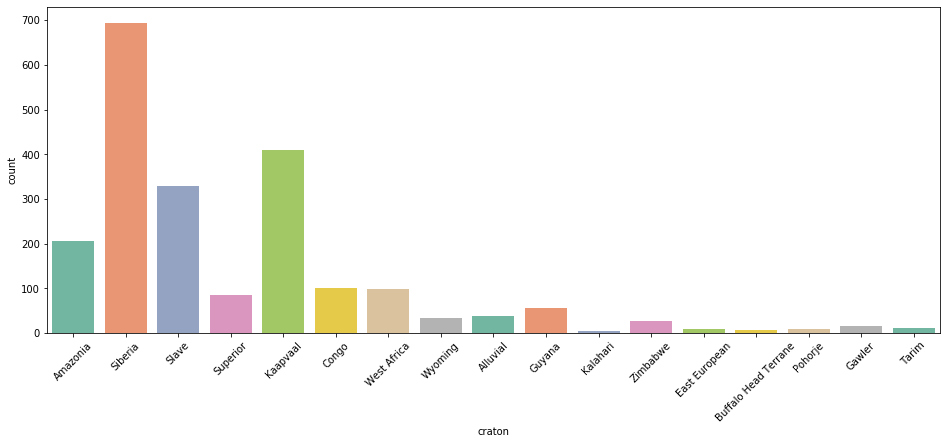

In [16]:
plt.figure(figsize=(16, 6))
sns.countplot(df.craton, palette="Set2")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

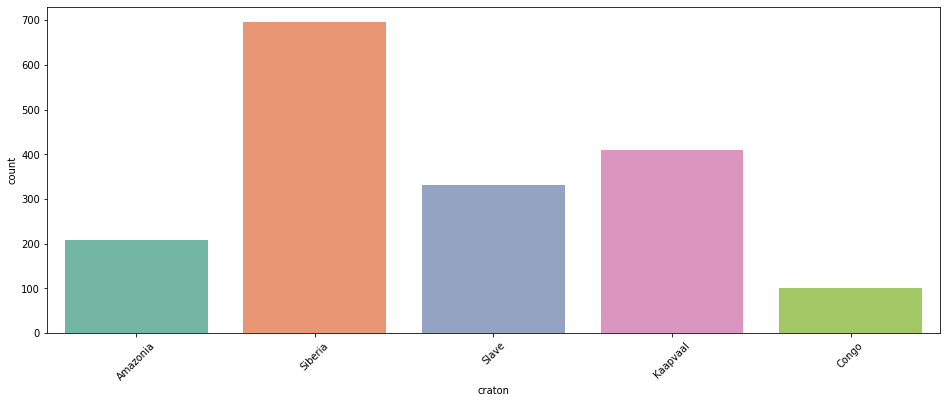

In [17]:
plt.figure(figsize=(16, 6))
sns.countplot(df_top5.craton, palette="Set2")
plt.xticks(rotation=45)

In [18]:
#df.craton = le.fit_transform(df.craton.astype(str))
df_top5.craton=df_top5.craton.astype('category')

In [19]:
df_top5.craton.value_counts()

Siberia     695
Kaapvaal    410
Slave       330
Amazonia    207
Congo       101
Name: craton, dtype: int64

In [20]:
df_top5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1743 entries, 0 to 2143
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   craton    1743 non-null   category
 1   Si        1582 non-null   float64 
 2   Ti        1582 non-null   float64 
 3   Al        1582 non-null   float64 
 4   Cr        1582 non-null   float64 
 5   V         1464 non-null   float64 
 6   Mn        1575 non-null   float64 
 7   Mg        1581 non-null   float64 
 8   Ca        1582 non-null   float64 
 9   Sr        1449 non-null   float64 
 10  Ba        1456 non-null   float64 
 11  Na        1576 non-null   float64 
 12  P         1526 non-null   float64 
 13  K         1581 non-null   float64 
 14  Fe        1582 non-null   float64 
 15  Co        1449 non-null   float64 
 16  Ni        1552 non-null   float64 
 17  S         1449 non-null   float64 
 18  Zn        1449 non-null   float64 
 19  Cr_trace  611 non-null    float64 
 20  Co_trace

Missing Value proportions

In [21]:
df.isnull().sum().sum() /(df.shape[0]* df.shape[1])

0.4580110120131052

In [22]:
df_top5.isnull().sum().sum() /(df_top5.shape[0]* df_top5.shape[1])

0.44439780026027453

### Split data into craton and elements

In [170]:
craton = df_top5.craton.values

In [173]:
craton

['Amazonia', 'Amazonia', 'Amazonia', 'Amazonia', 'Amazonia', ..., 'Slave', 'Slave', 'Siberia', 'Siberia', 'Siberia']
Length: 1743
Categories (5, object): ['Amazonia', 'Congo', 'Kaapvaal', 'Siberia', 'Slave']

In [23]:
cratons = df_top5.craton.values
cratons=cratons.astype('str')
cratons

array(['Amazonia', 'Amazonia', 'Amazonia', ..., 'Siberia', 'Siberia',
       'Siberia'], dtype=object)

In [24]:
le = LabelEncoder()
cratons = le.fit_transform(cratons)
cratons

array([0, 0, 0, ..., 3, 3, 3])

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

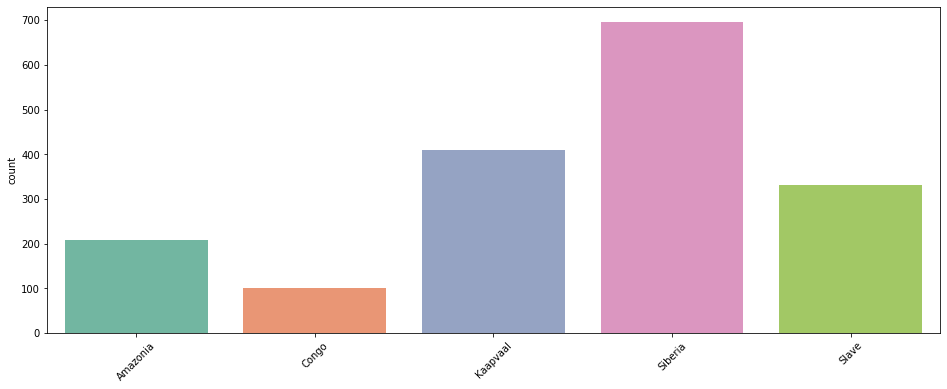

In [174]:
plt.figure(figsize=(16, 6))
sns.countplot(craton, palette="Set2")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

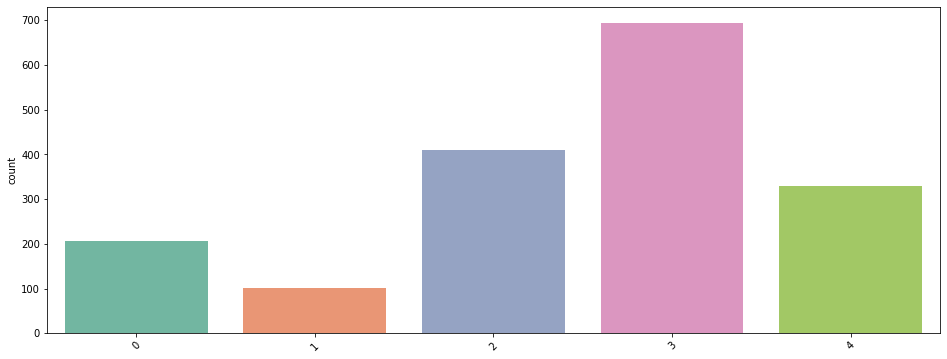

In [175]:
plt.figure(figsize=(16, 6))
sns.countplot(cratons, palette="Set2")
plt.xticks(rotation=45)

In [25]:
features = df_top5.drop(['craton'], axis=1)
features.shape

(1743, 40)

In [26]:
features.head()

,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace
0,0.000000,30.353616,0.008470,0.027368,0.0,0.363968,0.270,0.017143,0.0,0.0,0.023741,0.0,0.026553,37.022328,0.0,0.037718,0.0,0.0,136.0,79.0,31.0,0.2,0.300,27.4,335.0,4.00,0.600,2.100,0.60,0.192,0.0760,0.1472,0.224,0.1000,NaN,NaN,NaN,55.640,2706.0,NaN
1,0.014000,32.007960,0.047646,0.027368,0.0,0.394944,0.342,0.028572,0.0,0.0,0.023741,0.0,0.033192,33.281206,0.0,0.094296,0.0,0.0,260.0,56.0,181.0,0.4,0.800,56.6,227.0,3.20,0.700,2.400,2.50,0.312,0.1112,0.1288,0.392,0.3280,NaN,NaN,NaN,97.424,3251.0,NaN
2,0.070000,0.689310,1.138210,2.155230,0.0,0.201344,29.868,0.017143,0.0,0.0,0.023741,0.0,0.026553,36.368993,0.0,0.809374,0.0,0.0,4172.0,429.0,6375.0,1.6,0.144,25.2,4.8,0.56,0.096,0.056,0.32,0.400,0.1600,0.3200,0.640,0.3200,NaN,NaN,NaN,156.800,1887.0,NaN
3,0.004667,30.101868,0.008470,0.027368,0.0,0.565312,0.072,0.021429,0.0,0.0,0.023741,0.0,0.026553,35.941214,0.0,0.037718,0.0,0.0,2944.0,155.0,790.0,0.2,0.300,348.7,646.0,2.30,0.500,1.900,0.70,0.300,0.0688,0.1864,0.248,0.1544,NaN,NaN,NaN,71.488,2397.0,NaN
4,0.028000,32.463504,0.068822,0.027368,0.0,0.325248,0.300,0.017143,0.0,0.0,0.023741,0.0,0.026553,31.290089,0.0,0.055006,0.0,0.0,153.0,53.0,13.0,0.3,0.500,68.7,205.0,8.80,0.800,2.900,0.70,0.100,0.0000,0.1000,0.256,0.5000,NaN,NaN,NaN,67.304,2898.0,NaN


In [27]:
features.columns

Index(['Si', 'Ti', 'Al', 'Cr', 'V', 'Mn', 'Mg', 'Ca', 'Sr', 'Ba', 'Na', 'P',
       'K', 'Fe', 'Co', 'Ni', 'S', 'Zn', 'Cr_trace', 'Co_trace', 'Ni_trace',
       'Sr_trace', 'Y_trace', 'Zr_trace', 'Nb_trace', 'Ba_trace', 'La_trace',
       'Ce_trace', 'Nd_trace', 'Sm_trace', 'Eu_trace', 'Dy_trace', 'Er_trace',
       'Yb_trace', 'Ti_trace', 'Fe_trace', 'Al_trace', 'Ca_trace', 'Mn_trace',
       'Mg_trace'],
      dtype='object')

In [28]:
def plot_importance(feature_df, model, n_feature):
    '''
    Input:
        feature_df: The feature dataframe / The X_train with column names
        model: The training model
        n_feature: number of feature importance you want to display
    Output:
        A plot with the top n feature importance in decreasing order
    '''
    vals = model.feature_importances_
    df = pd.DataFrame(vals, index=feature_df.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
    df_n = df.iloc[:n_feature,]
    plt.figure(figsize=(16, 9))
    sns.barplot(df_n.index, df_n.Importance, palette="Set3")
    plt.xticks(rotation=45)

In [29]:
def get_metrics(mod, X_train, X_test, y_train, y_test):
    """ Returns a data frame of metrics (precision,
        recall, AUC ROC) from training and test sets.
        Assumes model has decision_function() method.
        This will at least work for SVC, LDA, QDA.
    """
    pred_train = mod.predict(X_train)
    pred_test = mod.predict(X_test)
    recall_train = recall_score(y_train, pred_train,average='weighted')
    recall_test = recall_score(y_test, pred_test, average='weighted')
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred_test, average='weighted')
    #rocauc_train = roc_auc_score(y_train, pred_train, average='weighted', multi_class='ovr')
    #rocauc_test = roc_auc_score(y_test, pred_test,average='weighted',multi_class='ovr')
    metrics = {'Set':['Train', 'Test'],
               'Recall':[recall_train, recall_test],
               'Precision':[precision_train, precision_test],
               #'ROC AUC':[rocauc_train, rocauc_test]}
              }
    return pd.DataFrame(metrics)

### Split into training set and test set

In [30]:
X_train, X_test, y_train, y_test = train_test_split(features, cratons, test_size=0.2, 
                                                    stratify = cratons, random_state = 2020)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1394, 40), (349, 40), (1394,), (349,))

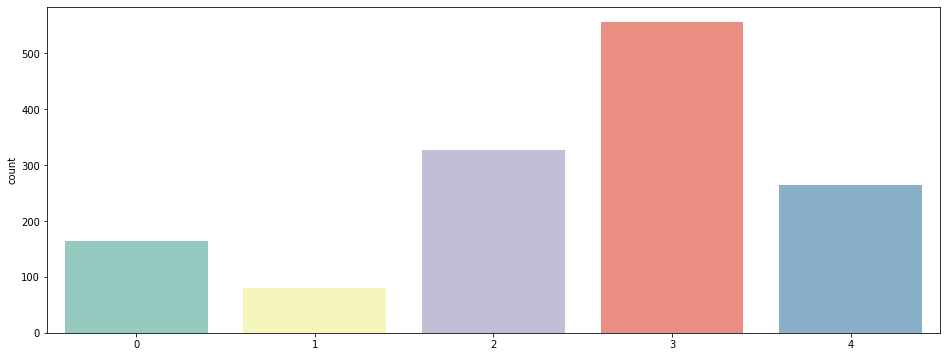

In [31]:
plt.figure(figsize=(16, 6))
sns.countplot(y_train, palette="Set3")

In [32]:
# from sklearn.utils import class_weight
# class_weights = list(class_weight.compute_class_weight('balanced',
#                                              np.unique(df['craton']),
#                                              df['craton']))

# w_array = np.ones(y_train.shape[0], dtype = 'float')
# for i, val in enumerate(y_train):
#     w_array[i] = class_weights[val-1]

In [33]:
#from sklearn.utils.class_weight import compute_sample_weight
# xgb_classifier.fit(X, y, sample_weight=compute_sample_weight("balanced", y))

# XGBoost

# Base Models

In [34]:
xg = XGBClassifier(random_state=2020)
xg.fit(X_train, y_train)
y_train_preds = xg.predict(X_train)
y_test_preds = xg.predict(X_test)

     Set    Recall  Precision
0  Train  1.000000   1.000000
1   Test  0.974212   0.974161


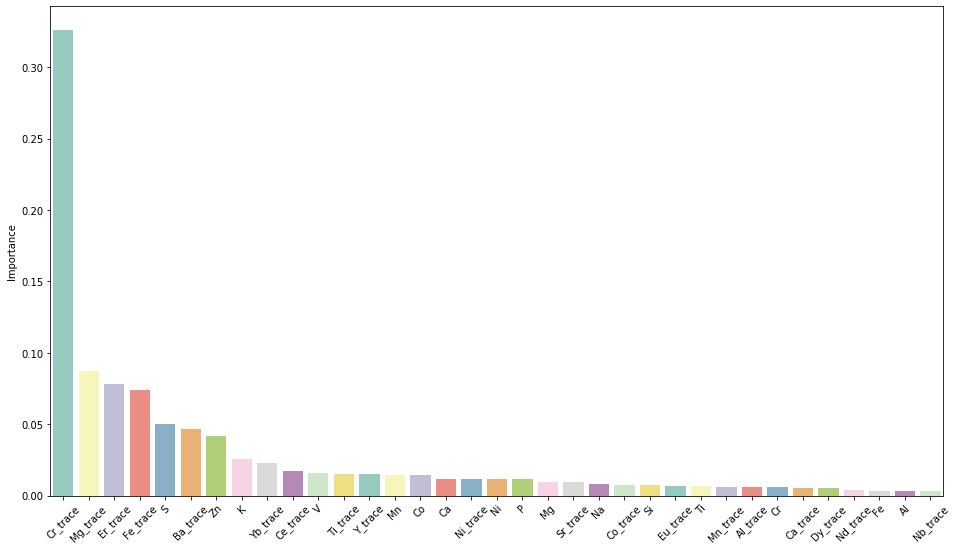

In [35]:
print(get_metrics(xg, X_train, X_test, y_train, y_test))
plot_importance(features, xg, 35)

In [36]:
# xgb = XGBClassifier(subsample=0.5, colsample_bytree=0.1, objective='multi:softmax', num_class = 9, 
#                     eval_metric = 'merror', seed=2020)

In [37]:
xgb = XGBClassifier(objective='multi:softmax', num_class = 5, 
                    eval_metric = 'merror', seed=2021)
xgb.fit(X_train, y_train)
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

#May not work since got the same scores

In [38]:
get_metrics(xgb, X_train, X_test, y_train, y_test)

,Set,Recall,Precision
0,Train,1.000000,1.000000
1,Test,0.974212,0.974161


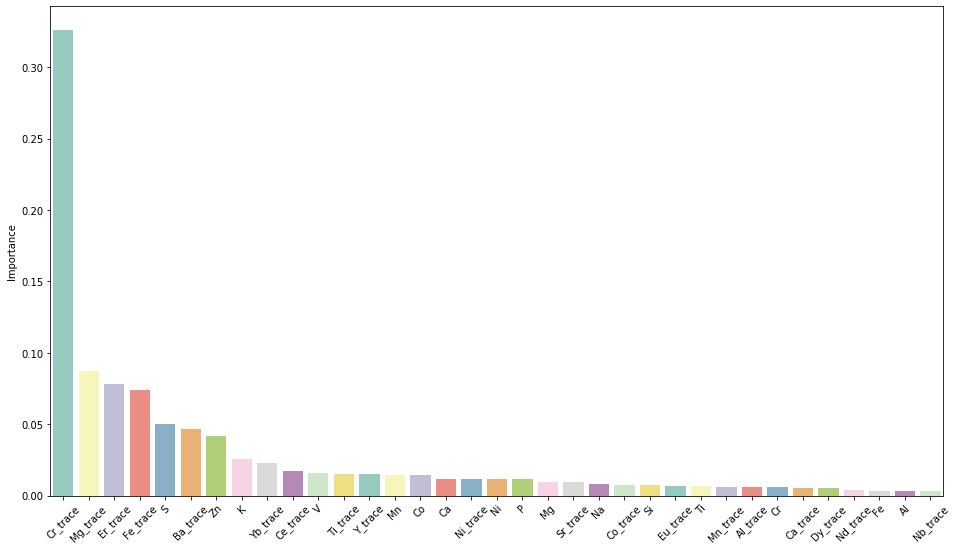

In [39]:
plot_importance(features, xgb, 35)

### Model Optimization

In [40]:
learning_rate = [0.01, 0.05, 0.1, 0.2, 1]
depth = [3, 4, 5, 6, 7]
min_split = [1, 2, 3, 4, 5]

In [41]:
# scorings = {'f1_samples': make_scorer(recall_score, average = 'samples'),
#            'f1_macro': make_scorer(f1_score, average = 'macro'),
#            'f1_weighted': make_scorer(f1_score, average = 'weighted')}

In [42]:
# scorings = {'accuracy': make_scorer(accuracy_score), 
#            'f1_samples': make_scorer(recall_score, average = 'samples'),
#            'f1_macro': make_scorer(f1_score, average = 'macro'),
#            'f1_weighted': make_scorer(f1_score, average = 'weighted')}

In [43]:
xgb = XGBClassifier(objective='multi:softmax', num_class = 5, 
                    eval_metric = 'merror', tree_method='hist', seed=2021)

In [44]:
xgb_cv = GridSearchCV(xgb, param_grid = {'eta': learning_rate, 'gamma': min_split, 'max_depth': depth}, 
                      cv=5, scoring='accuracy') #weight=
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='merror', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, num_class=5,
                                     num_parallel_tree=None,
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=None,
           

In [45]:
xgb_cv.best_params_

{'eta': 0.05, 'gamma': 1, 'max_depth': 7}

In [46]:
xgb_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.05,
              eval_metric='merror', gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.0500000007,
              max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_class=5, num_parallel_tree=1, objective='multi:softprob',
              random_state=2021, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, seed=2021, subsample=1, tree_method='hist',
              validate_parameters=1, ...)

In [47]:
xgb_cv.best_score_

0.9519300688481472

In [48]:
xgb_best = xgb_cv.best_estimator_

In [49]:
y_train_preds = xgb_best.predict(X_train)
y_test_preds = xgb_best.predict(X_test)

In [50]:
print(get_metrics(xgb_best, X_train, X_test, y_train, y_test))

     Set    Recall  Precision
0  Train  0.989957   0.990008
1   Test  0.957020   0.958586


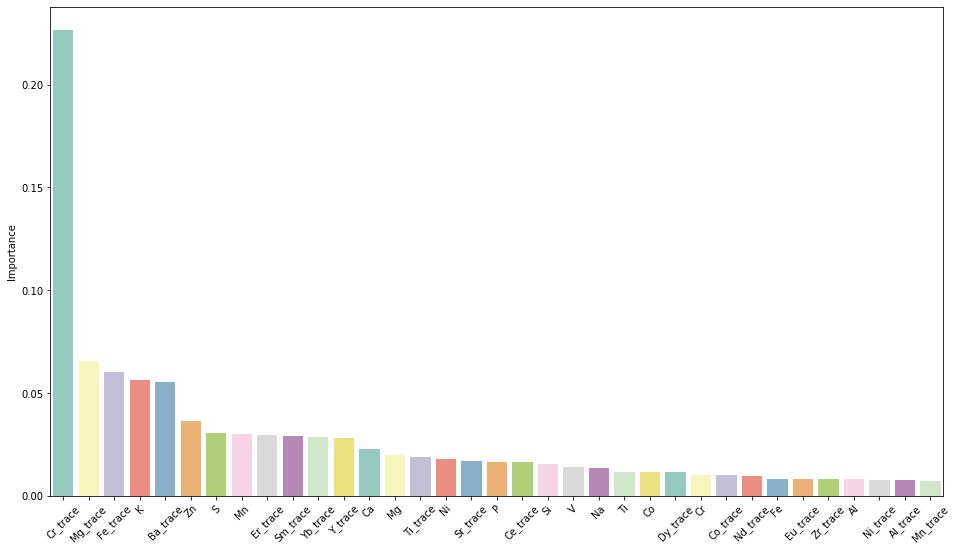

In [51]:
plot_importance(features, xgb_best, 35)

### ============ Save the best model ==================================

In [52]:
xgb_best = XGBClassifier(objective='multi:softmax', num_class = 5, eval_metric = 'merror', tree_method='hist', 
                    eta = 0.05, gamma = 1, max_depth = 7, seed=2021)
xgb_best.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.05,
              eval_metric='merror', gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.0500000007,
              max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_class=5, num_parallel_tree=1, objective='multi:softprob',
              random_state=2021, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, seed=2021, subsample=1, tree_method='hist',
              validate_parameters=1, ...)

In [53]:
y_train_preds = xgb_best.predict(X_train)
y_test_preds = xgb_best.predict(X_test)

In [54]:
print(get_metrics(xgb_best, X_train, X_test, y_train, y_test))

     Set    Recall  Precision
0  Train  0.989957   0.990008
1   Test  0.957020   0.958586


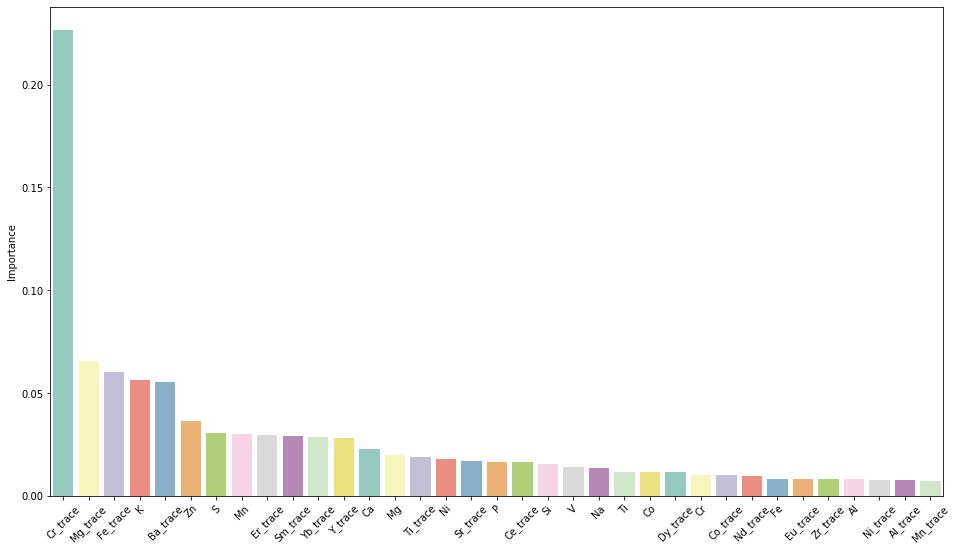

In [55]:
plot_importance(features, xgb_best, 35)

In [56]:
#pip install shap

In [57]:
import shap

In [58]:
# # explain the model's predictions using SHAP
# # (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
# explainer = shap.TreeExplainer(xgb_best)
# shap_values = explainer.shap_values(X_train)

In [59]:
# # take the mean absolute value of the SHAP values for 
# # each feature to get a standard bar plot (produces stacked bars for multi-class outputs)
# shap.summary_plot(shap_values, X_train, plot_type="bar")

# Sampling

In [60]:
from imblearn.over_sampling import RandomOverSampler #
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
pd.options.display.max_columns = None # display all columns

In [61]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority', random_state=2021)

In [62]:
# fit and apply the transform
X_o_train, y_o_train = oversample.fit_resample(X_train, y_train)

In [63]:
# fit and apply the transform
X_o_train, y_o_train = oversample.fit_resample(X_o_train, y_o_train)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

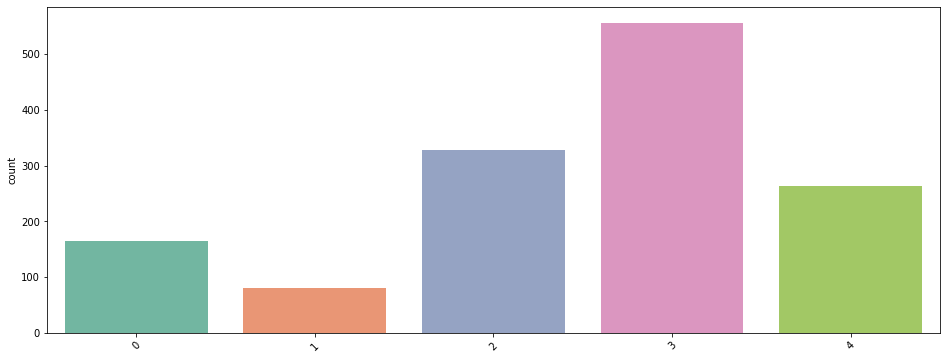

In [64]:
plt.figure(figsize=(16, 6))
sns.countplot(y_train, palette="Set2")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

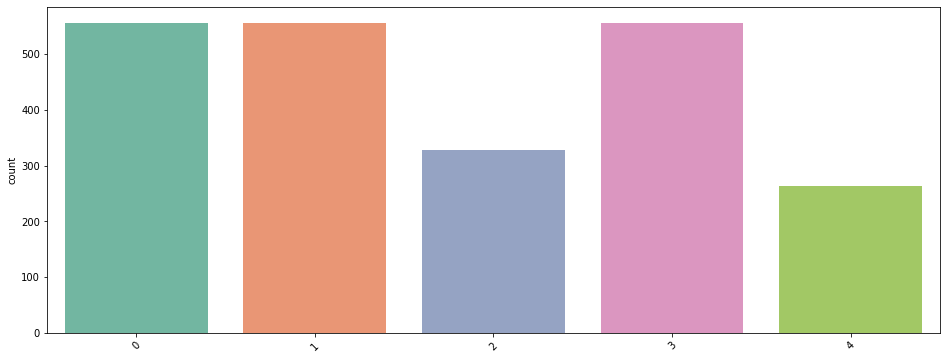

In [65]:
plt.figure(figsize=(16, 6))
sns.countplot(y_o_train, palette="Set2")
plt.xticks(rotation=45)

In [66]:
# fit and apply the transform 
## X 10 times
X_o_train, y_o_train = oversample.fit_resample(X_o_train, y_o_train)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

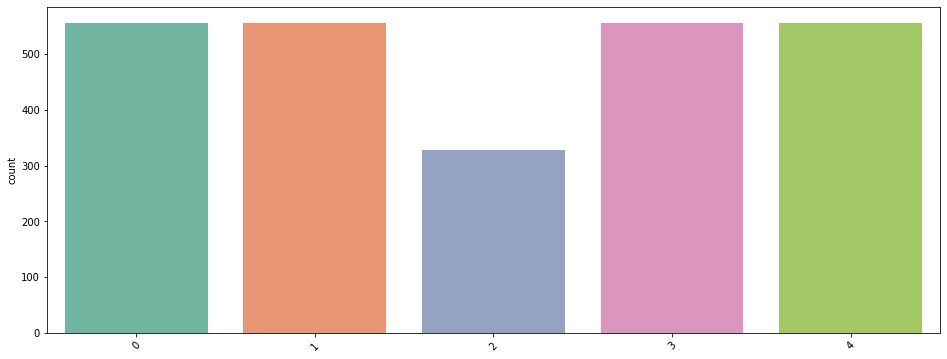

In [67]:
plt.figure(figsize=(16, 6))
sns.countplot(y_o_train, palette="Set2")
plt.xticks(rotation=45)

In [68]:
balance=pd.merge(pd.DataFrame(y_o_train), pd.DataFrame(X_o_train), left_index=True, right_index=True)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

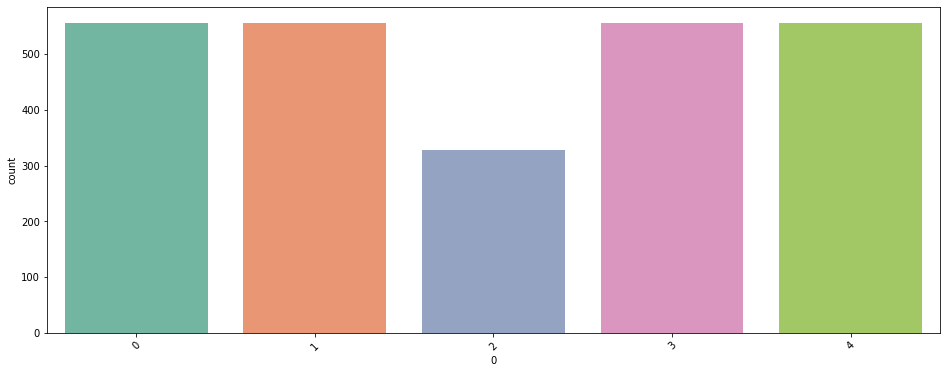

In [69]:
plt.figure(figsize=(16, 6))
sns.countplot(balance.iloc[:, 0], palette="Set2")
plt.xticks(rotation=45)

In [70]:
xg_bala = XGBClassifier(random_state=2020)
xg_bala.fit(X_o_train, y_o_train)
y_train_preds = xg_bala.predict(X_o_train)
y_test_preds = xg_bala.predict(X_test)

In [71]:
print(get_metrics(xg_bala, X_o_train, X_test, y_o_train, y_test))

     Set    Recall  Precision
0  Train  1.000000   1.000000
1   Test  0.968481   0.968757


# Model Optimization

In [74]:
xgb = XGBClassifier(objective='multi:softmax', num_class = 5, 
                    eval_metric = 'merror', tree_method='hist', seed=2020)

In [75]:
xgb_cv = GridSearchCV(xgb, param_grid = {'eta': learning_rate, 'gamma': min_split, 'max_depth': depth}, 
                      cv=5, scoring='accuracy')
xgb_cv.fit(X_o_train, y_o_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='merror', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, num_class=5,
                                     num_parallel_tree=None,
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=None,
           

In [76]:
#xgb_cv.best_params_

In [77]:
#xgb_cv.best_estimator_

In [78]:
xgb_cv.best_score_

0.9811933540539503

In [79]:
xgb_best = xgb_cv.best_estimator_

In [80]:
y_train_preds = xgb_best.predict(X_o_train)
y_test_preds = xgb_best.predict(X_test)

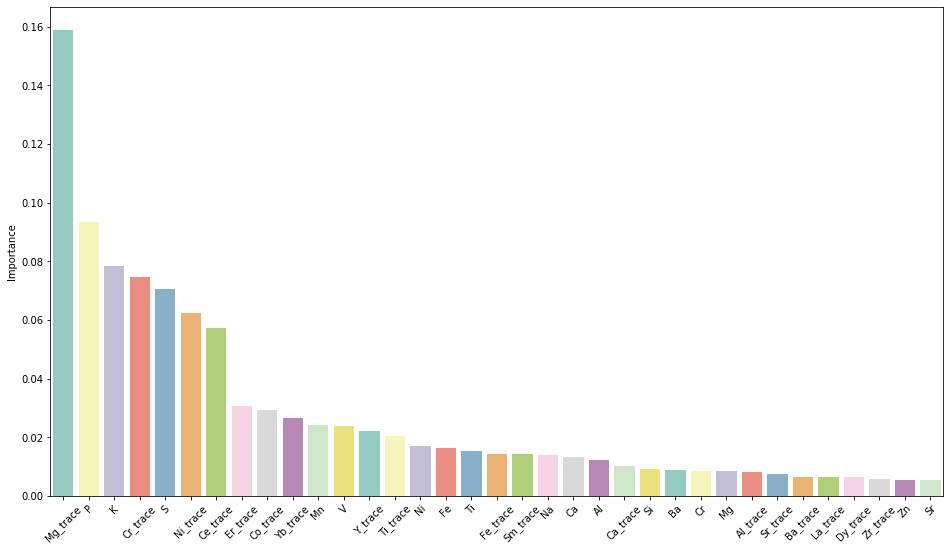

In [81]:
plot_importance(features, xgb_best, 35)

In [82]:
print(get_metrics(xgb_best, X_o_train, X_test, y_o_train, y_test))

     Set    Recall  Precision
0  Train  0.998041   0.998053
1   Test  0.959885   0.961741


# Save the best model after oversampling

In [83]:
xgb_best = XGBClassifier(objective='multi:softmax', num_class = 5, 
                    eval_metric = 'merror', tree_method='hist', 
                    eta = 0.1, gamma = 1, max_depth = 7, seed=2020)
xgb_best.fit(X_o_train, y_o_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1,
              eval_metric='merror', gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_class=5, num_parallel_tree=1, objective='multi:softprob',
              random_state=2020, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, seed=2020, subsample=1, tree_method='hist',
              validate_parameters=1, ...)

In [84]:
print(get_metrics(xgb_best, X_o_train, X_test, y_o_train, y_test))

     Set    Recall  Precision
0  Train  0.997649   0.997659
1   Test  0.957020   0.959778


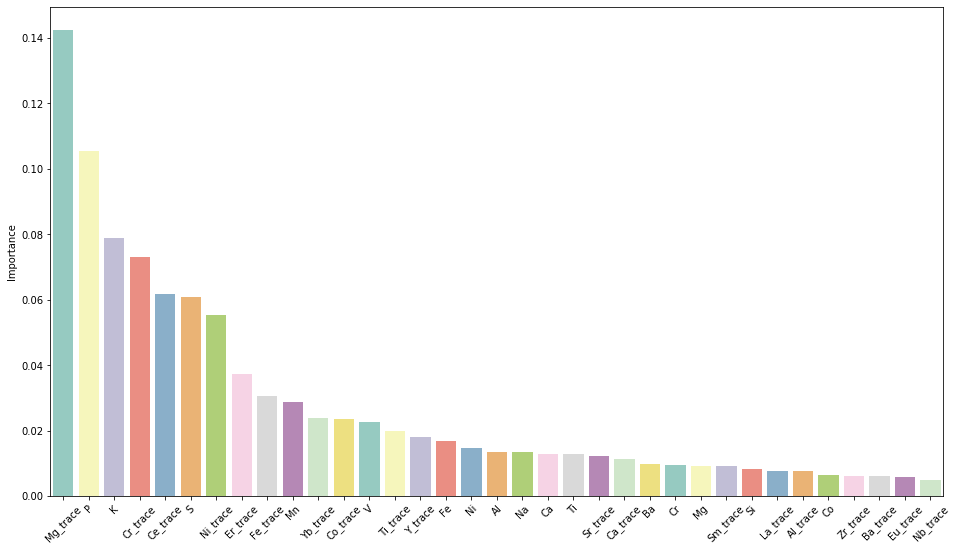

In [85]:
plot_importance(features, xgb_best, 35)

# Sampling Validation

In [86]:
X_o_train.head()

,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace
0,3.901361,0.839160,2.006426,0.225786,0.0,0.518848,12.954000,17.457492,0.0,0.0,2.106996,1.060938,4.904059,20.650059,0.000000,0.000000,0.304,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19.464946,0.000599,0.005082,0.034894,0.0,0.075117,30.888780,0.018572,0.0,0.0,0.000000,0.000000,0.000000,5.474482,0.013175,0.292038,0.000,0.0,174.471,131.735245,2920.378552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.995,54711.0378,50.81280,185.822000,751.168,310483.7203
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000,NaN,2.500000,26.0,4.0,13.0,1.6,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,810.000,500.0000,NaN,615.000000,2.500,NaN
3,19.154470,0.001798,0.001398,0.018473,0.0,0.076085,30.623593,0.012420,0.0,0.0,0.000000,0.000000,0.000000,5.676472,0.000000,0.292612,0.000,0.0,92.367,NaN,2926.122750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.985,56729.6859,13.97352,124.272036,760.848,307818.1450
4,27.066860,0.000000,13.658520,0.000000,0.0,0.000000,0.000000,2.071470,0.0,0.0,0.000000,0.000000,1.742559,2.022228,0.000000,1.100120,1.240,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
#X_o_train.to_csv('X_o_train_Top5Craton_Oversampling', index=False)

In [88]:
#X_train.to_csv('X_train_Top5Craton_Oversampling', index=False)

In [89]:
#Y_train=pd.DataFrame()
#Y_train['y_train'] = y_train

In [90]:
#Y_o_train=pd.DataFrame()
#Y_o_train['y_o_train'] = y_o_train

In [91]:
#Y_o_train.to_csv('y_o_train_Top5Craton_Oversampling', index=False)

In [92]:
import sys
sys.path.insert(0,'..')

In [93]:
from monte_carlo_simulator import monte_carlo_simulator
from earth_data_plot import distribution_plot, logged_distribution_plot, correlation_plot
import warnings
warnings.filterwarnings('ignore')

In [94]:
# X_train.columns

In [95]:
# num_cols= ['Si', 'Ti', 'Al', 'Cr', 'V', 'Mn', 'Mg', 'Ca', 'Sr', 'Ba', 'Na', 'P',
#        'K', 'Fe', 'Co', 'Ni', 'S', 'Zn', 'Cr_trace', 'Co_trace', 'Ni_trace',
#        'Sr_trace', 'Y_trace', 'Zr_trace', 'Nb_trace', 'Ba_trace', 'La_trace',
#        'Ce_trace', 'Nd_trace', 'Sm_trace', 'Eu_trace', 'Dy_trace', 'Er_trace',
#        'Yb_trace', 'Ti_trace', 'Fe_trace', 'Al_trace', 'Ca_trace', 'Mn_trace',
#        'Mg_trace']

In [96]:
#X_train[num_cols].isnull().mean().sort_values(ascending=False)

In [97]:
#distribution_plot(num_cols, X_train)

In [98]:
#distribution_plot(num_cols, X_o_train)

In [99]:
#logged_distribution_plot(num_cols, X_train)

In [100]:
#correlation_plot(num_cols, X_train)

# Monte_carlo_simulator Evaluation: statistical differ caused by oversampling

In [101]:
# # 100 simulations with Wilcoxon test
# monte_carlo_simulator(X_train, X_o_train, sample_size = 50, 
#                       iteration = 100, test = 'wilcoxon', confidence = 0.05)

In [102]:
# # 100 simulations with Kruskal-Wallis test
# monte_carlo_simulator(X_train, X_o_train, sample_size = 100,  
#                       iteration = 100, test = 'kruskal', confidence = 0.05)

In [103]:
# # 1000 simulations with Wilcoxon test
# monte_carlo_simulator(X_train, X_o_train, sample_size = 1000, 
#                       iteration = 100, test = 'wilcoxon', confidence = 0.05)

In [104]:
# # 1000 simulations with Kruskal-Wallis test
# monte_carlo_simulator(X_train, X_o_train, sample_size = 1000, 
#                       iteration = 100, test = 'kruskal', confidence = 0.05)

# Use Probability Plots to see if the distributions before & after the oversampling statistically differ from each other

In [105]:
# from earth_data_plot import probability_plot

In [106]:
# probability_plot(num_cols, X_train, X_o_train)

In [107]:
# probability_plot(num_cols, Y_train, Y_o_train)

In [108]:
# probability_plot(num_cols, X_train, X_train)

In [109]:
# probability_plot(num_cols, X_train.fillna(0), X_train.fillna(0))

In [110]:
# probability_plot(num_cols, X_train.fillna(0), X_o_train.fillna(0))

# Statistical Infor for trains before and after double-resampling

In [111]:
X_train.head()

,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace
641,3.901361,0.839160,2.006426,0.225786,0.0,0.518848,12.954000,17.457492,0.0,0.0,2.106996,1.060938,4.904059,20.650059,0.000000,0.000000,0.304,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1763,19.464946,0.000599,0.005082,0.034894,0.0,0.075117,30.888780,0.018572,0.0,0.0,0.000000,0.000000,0.000000,5.474482,0.013175,0.292038,0.000,0.0,174.471,131.735245,2920.378552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.995,54711.0378,50.81280,185.822000,751.168,310483.7203
804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000,NaN,2.500000,26.0,4.0,13.0,1.6,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,810.000,500.0000,NaN,615.000000,2.500,NaN
1617,19.154470,0.001798,0.001398,0.018473,0.0,0.076085,30.623593,0.012420,0.0,0.0,0.000000,0.000000,0.000000,5.676472,0.000000,0.292612,0.000,0.0,92.367,NaN,2926.122750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.985,56729.6859,13.97352,124.272036,760.848,307818.1450
1341,27.066860,0.000000,13.658520,0.000000,0.0,0.000000,0.000000,2.071470,0.0,0.0,0.000000,0.000000,1.742559,2.022228,0.000000,1.100120,1.240,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
y_train

array([3, 3, 3, ..., 2, 0, 1])

## Before Oversampling

In [113]:
X_df=X_train.copy()
X_df['y']=y_train.tolist()

In [114]:
X_df.head(2)

,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace,y
641,3.901361,0.839160,2.006426,0.225786,0.0,0.518848,12.95400,17.457492,0.0,0.0,2.106996,1.060938,4.904059,20.650059,0.000000,0.000000,0.304,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1763,19.464946,0.000599,0.005082,0.034894,0.0,0.075117,30.88878,0.018572,0.0,0.0,0.000000,0.000000,0.000000,5.474482,0.013175,0.292038,0.000,0.0,174.471,131.735245,2920.378552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.995,54711.0378,50.8128,185.822,751.168,310483.7203,3


In [115]:
X_df.groupby('y').describe()

Si                                                                  \
   count       mean        std      min        25%        50%        75%   
y                                                                          
0  164.0  10.079443  10.612367   0.0000   0.093334   0.868006  19.056469   
1   11.0  26.194380   4.485167  20.5348  23.895040  26.181870  27.185275   
2  327.0  15.816969   9.335854   0.0000  17.844275  19.390138  19.901142   
3  515.0  18.216498   4.664579   0.0000  19.121290  19.247600  19.360972   
4  246.0  12.673159  10.605587   0.0000   0.081671  18.694800  19.648070   

                 Ti                                                   \
         max  count      mean       std  min           25%       50%   
y                                                                      
0  46.853668  164.0  3.282115  9.099698  0.0  4.795200e-03  0.029970   
1  37.380267   11.0  0.146011  0.291734  0.0  1.498250e-02  0.041951   
2  27.813532  327.0  0.106360  0.380850  0.0  0.000000e+00  0.005994   
3  44.193649  515.0  0.146351  0.515584  0.0  5.994000e-07  0.001199   
4  46.436650  246.0  0.442736  0.994714  0.0  0.000000e+00  0.020977   

                           Al                                          \
        75%        max  count      mean       std       min       25%   
y                                                                       
0  0.191808  33.656310  164.0  3.648554  5.883353  0.000000  0.026470   
1  0.125853   1.006824   11.0  4.858929  7.122991  0.047646  0.447343   
2  0.149850   6.383610  327.0  5.818362  4.851987  0.000000  0.015882   
3  0.002997   4.315680  515.0  1.233661  4.014296  0.000000  0.003176   
4  0.322178   4.675320  246.0  4.296468  7.688490  0.000000  0.000000   

                                      Cr                             \
        50%        75%        max  count       mean        std  min   
y                                                                     
0  1.733785   4.319904  35.226276  164.0  13.149517  19.480366  0.0   
1  1.471732   5.241060  20.117200   11.0   0.159854   0.308775  0.0   
2  7.935706  10.212126  12.722400  327.0   2.379123   5.015046  0.0   
3  0.005633   0.011919  52.940000  515.0   0.313289   1.739459  0.0   
4  0.899980   7.183958  70.939600  246.0   2.640467   9.419814  0.0   

                                                     V                \
            25%       50%        75%        max  count          mean   
y                                                                      
0  3.421000e-02  0.191576  42.916445  48.851880  153.0  3.851633e-02   
1  6.842000e-07  0.075262   0.147103   1.067352   11.0  1.730164e-02   
2  1.368400e-02  0.150524   4.313881  46.703492  291.0  6.469997e-03   
3  1.984180e-02  0.029421   0.043105  14.299780  498.0  0.000000e+00   
4  0.000000e+00  0.000000   0.123156  45.225620  215.0  6.322791e-09   

                                                                         Mn  \
            std  min           25%       50%       75%           max  count   
y                                                                             
0  6.142587e-02  0.0  0.000000e+00  0.000000  0.101955  1.699250e-01  164.0   
1  1.954959e-02  0.0  6.797000e-07  0.013594  0.027188  6.117300e-02   11.0   
2  2.160241e-02  0.0  0.000000e+00  0.000000  0.000000  2.175040e-01  327.0   
3  0.000000e+00  0.0  0.000000e+00  0.000000  0.000000  0.000000e+00  508.0   
4  6.540274e-08  0.0  0.000000e+00  0.000000  0.000000  6.797000e-07  246.0   

                                                                        Mg  \
       mean       std  min       25%       50%       75%        max  count   
y                                                                            
0  0.240532  0.496061  0.0  0.077440  0.170368  0.226512   4.654144  164.0   
1  0.081664  0.098769  0.0  0.027104  0.046464  0.100672   0.332992   11.0   
2  0.176786  0.214632  0.0  0.034848  0.139392  0.216832   1.24678

## After Oversampling

In [116]:
X_o_df=X_o_train.copy()
X_o_df['y']=y_o_train.tolist()

In [117]:
X_o_df.groupby('y').describe()  

Si                                                                  \
   count       mean        std      min        25%        50%        75%   
y                                                                          
0  551.0   9.853680  10.561698   0.0000   0.088667   0.275335  19.040136   
1   78.0  26.072221   3.760937  20.5348  25.948520  26.181870  27.255280   
2  327.0  15.816969   9.335854   0.0000  17.844275  19.390138  19.901142   
3  515.0  18.216498   4.664579   0.0000  19.121290  19.247600  19.360972   
4  514.0  13.195886  10.581365   0.0000   0.210011  18.713467  19.729742   

                 Ti                                                   \
         max  count      mean       std  min           25%       50%   
y                                                                      
0  46.853668  551.0  3.267532  9.122866  0.0  4.795200e-03  0.029970   
1  37.380267   78.0  0.131385  0.238524  0.0  2.397200e-02  0.065923   
2  27.813532  327.0  0.106360  0.380850  0.0  0.000000e+00  0.005994   
3  44.193649  515.0  0.146351  0.515584  0.0  5.994000e-07  0.001199   
4  46.436650  514.0  0.458036  0.999787  0.0  0.000000e+00  0.029970   

                           Al                                          \
        75%        max  count      mean       std       min       25%   
y                                                                       
0  0.191808  33.656310  551.0  3.756756  6.225185  0.000000  0.026470   
1  0.137839   1.006824   78.0  4.527660  6.604316  0.047646  0.195878   
2  0.149850   6.383610  327.0  5.818362  4.851987  0.000000  0.015882   
3  0.002997   4.315680  515.0  1.233661  4.014296  0.000000  0.003176   
4  0.358142   4.675320  514.0  4.387490  7.416577  0.000000  0.000000   

                                      Cr                             \
        50%        75%        max  count       mean        std  min   
y                                                                     
0  1.672904   4.285493  35.226276  551.0  12.886217  19.338217  0.0   
1  1.471732   4.817540  20.117200   78.0   0.215786   0.353307  0.0   
2  7.935706  10.212126  12.722400  327.0   2.379123   5.015046  0.0   
3  0.005633   0.011919  52.940000  515.0   0.313289   1.739459  0.0   
4  1.252031   7.517480  70.939600  514.0   2.307634   8.895884  0.0   

                                                     V                \
            25%       50%        75%        max  count          mean   
y                                                                      
0  3.421000e-02  0.184734  42.625660  48.851880  516.0  3.775233e-02   
1  6.842000e-07  0.088946   0.150524   1.067352   78.0  1.760266e-02   
2  1.368400e-02  0.150524   4.313881  46.703492  291.0  6.469997e-03   
3  1.984180e-02  0.029421   0.043105  14.299780  498.0  0.000000e+00   
4  0.000000e+00  0.000000   0.116314  45.225620  452.0  6.015044e-09   

                                                                         Mn  \
            std  min           25%       50%       75%           max  count   
y                                                                             
0  6.088525e-02  0.0  0.000000e+00  0.000000  0.105354  1.699250e-01  551.0   
1  1.705614e-02  0.0  6.797000e-07  0.016993  0.033985  6.117300e-02   78.0   
2  2.160241e-02  0.0  0.000000e+00  0.000000  0.000000  2.175040e-01  327.0   
3  0.000000e+00  0.0  0.000000e+00  0.000000  0.000000  0.000000e+00  508.0   
4  6.372778e-08  0.0  0.000000e+00  0.000000  0.000000  6.797000e-07  514.0   

                                                                        Mg  \
       mean       std  min       25%       50%       75%        max  count   
y                                                                            
0  0.250560  0.487733  0.0  0.077440  0.170368  0.232320   4.654144  551.0   
1  0.080617  0.084458  0.0  0.038720  0.054208  0.147136   0.332992   78.0   
2  0.176786  0.214632  0.0  0.034848  0.139392  0.216832   1.24678

#Ca(1row), K(1row), Ni(row 1), Cr_trace(row1), La_trace(row1), Co_trace(row 1), Zr_trace(row 1), Ce_trace(row1), Nd_trace(row1), Eu_trace

# Statistical Differences

In [118]:
Median_diff=X_df.groupby('y').median()-X_o_df.groupby('y').median()
Median_diff.reset_index(inplace = True)
Median_diff

,y,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace
0,0,0.592671,0.000000,0.060881,0.006842,0.000000,0.000000,0.066,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,548.5,12.000,855.5,-0.10,0.00,-1.1,0.000,-0.89,-0.035,-0.53,0.00,0.000,0.0,0.0,0.08,0.00,0.00,NaN,NaN,6.8,-9.5,NaN
1,1,0.000000,-0.023972,0.000000,-0.013684,-0.003399,-0.007744,0.000,-0.078573,0.0,0.0,-0.185475,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,NaN,0.000,-35.0,-66.50,NaN,0.0,1.000,-23.00,-3.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,741.00,-1076.0,NaN,NaN,0.0,NaN
2,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.00,0.0,0.000,0.00,0.000,0.00,0.00,0.000,0.0,0.0,0.00,0.00,0.00,NaN,0.0,0.0,0.0,0.0
3,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.00,0.0,0.000,0.00,0.000,0.00,0.00,0.000,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
4,4,-0.018667,-0.008993,-0.352051,0.000000,0.000000,0.000000,-0.105,-0.964305,0.0,0.0,-0.007419,0.0,0.0,-0.116667,0.0,0.0,0.0,0.0,-25.5,-0.005,-32.0,-0.44,0.21,1.6,-0.455,-0.10,-0.205,0.00,0.09,-0.015,0.0,0.1,0.00,-0.05,0.02,0.0,0.0,-0.8,0.0,0.0


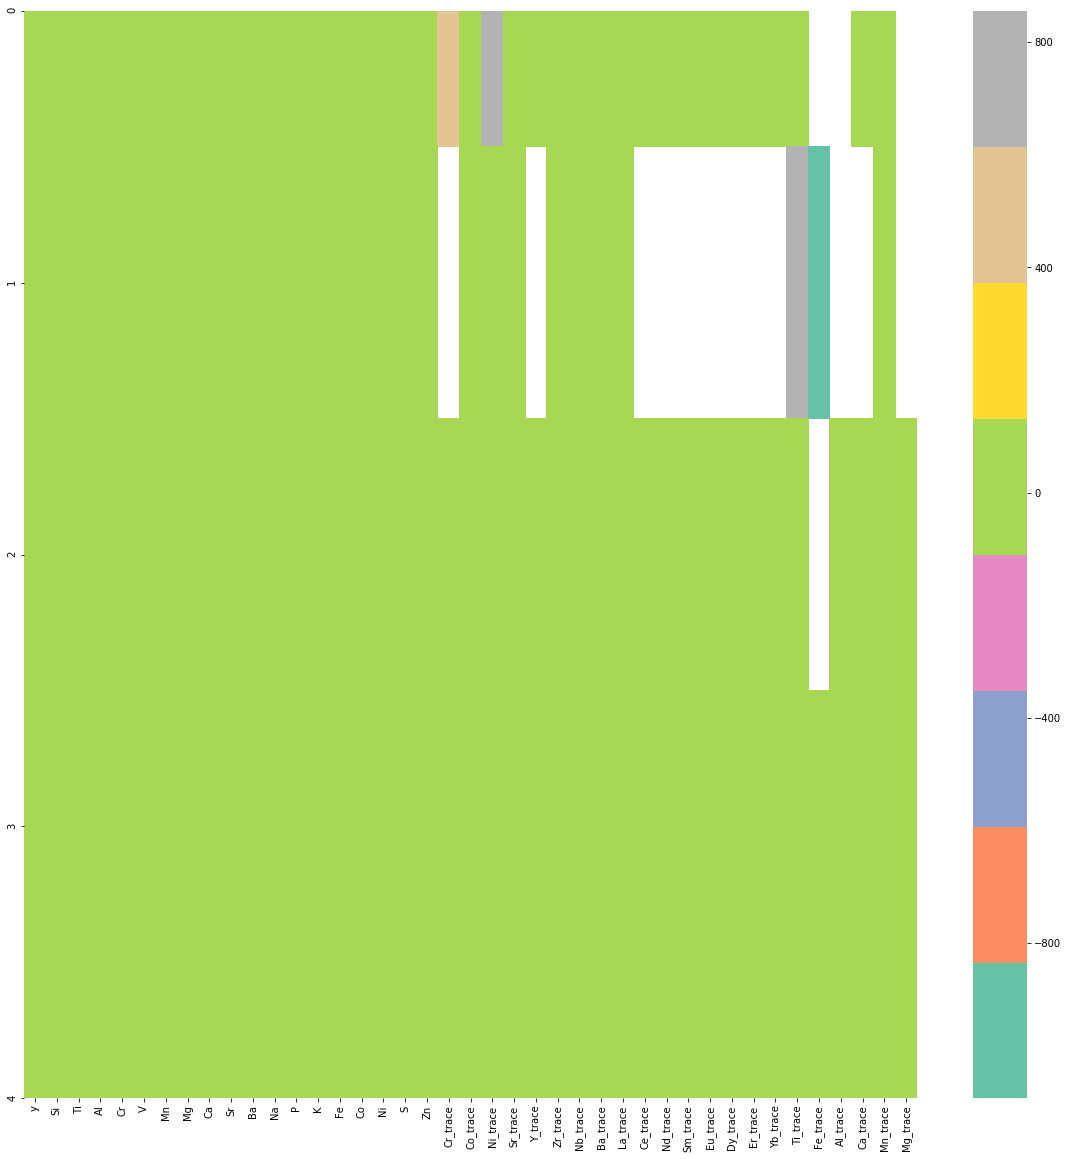

In [119]:
plt.figure(figsize=(20, 20))
sns.heatmap(Median_diff, cmap='Set2')

In [120]:
Stat_diff=X_df.groupby('y').describe()-X_o_df.groupby('y').describe()
Stat_diff

Si                                                                 Ti  \
   count      mean       std  min       25%       50%       75%  max  count   
y                                                                             
0 -387.0  0.225764  0.050670  0.0  0.004667  0.592671  0.016333  0.0 -387.0   
1  -67.0  0.122159  0.724230  0.0 -2.053480  0.000000 -0.070005  0.0  -67.0   
2    0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0    0.0   
3    0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0    0.0   
4 -268.0 -0.522727  0.024222  0.0 -0.128339 -0.018667 -0.081672  0.0 -268.0   

                                                                 Al            \
       mean       std  min      25%       50%       75%  max  count      mean   
y                                                                               
0  0.014582 -0.023168  0.0  0.00000  0.000000  0.000000  0.0 -387.0 -0.108201   
1  0.014626  0.053210  0.0 -0.00899 -0.023972 -0.011986  0.0  -67.0  0.331270   
2  0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.0    0.0  0.000000   
3  0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.0    0.0  0.000000   
4 -0.015300 -0.005073  0.0  0.00000 -0.008993 -0.035964  0.0 -268.0 -0.091022   

                                                        Cr            \
        std  min       25%       50%       75%  max  count      mean   
y                                                                      
0 -0.341832  0.0  0.000000  0.060881  0.034411  0.0 -387.0  0.263300   
1  0.518675  0.0  0.251465  0.000000  0.423520  0.0  -67.0 -0.055932   
2  0.000000  0.0  0.000000  0.000000  0.000000  0.0    0.0  0.000000   
3  0.000000  0.0  0.000000  0.000000  0.000000  0.0    0.0  0.000000   
4  0.271913  0.0  0.000000 -0.352051 -0.333522  0.0 -268.0  0.332833   

                                                    V                \
        std  min  25%       50%       75%  max  count          mean   
y                                                                     
0  0.142149  0.0  0.0  0.006842  0.290785  0.0 -363.0  7.640039e-04   
1 -0.044533  0.0  0.0 -0.013684 -0.003421  0.0  -67.0 -3.010215e-04   
2  0.000000  0.0  0.0  0.000000  0.000000  0.0    0.0  0.000000e+00   
3  0.000000  0.0  0.0  0.000000  0.000000  0.0    0.0  0.000000e+00   
4  0.523930  0.0  0.0  0.000000  0.006842  0.0 -237.0  3.077464e-10   

                                                       Mn                      \
            std  min  25%       50%       75%  max  count      mean       std   
y                                                                               
0  5.406230e-04  0.0  0.0  0.000000 -0.003398  0.0 -387.0 -0.010028  0.008328   
1  2.493449e-03  0.0  0.0 -0.003399 -0.006797  0.0  -67.0  0.001047  0.014311   
2  0.000000e+00  0.0  0.0  0.000000  0.000000  0.0    0.0  0.000000  0.000000   
3  0.000000e+00  0.0  0.0  0.000000  0.000000  0.0    0.0  0.000000  0.000000   
4  1.674962e-09  0.0  0.0  0.000000  0.000000  0.0 -268.0 -0.027135 -0.139793   

                                              Mg                           \
   min       25%       50%       75%  max  count      mean       std  min   
y                                                                           
0  0.0  0.000000  0.000000 -0.005808  0.0 -387.0  0.298016  0.083417  0.0   
1  0.0 -0.011616 -0.007744 -0.046464  0.0  -67.0 -0.580531  0.675747  0.0   
2  0.0  0.000000  0.000000  0.000000  0.0    0.0  0.000000  0.000000  0.0   
3  0.0  0.000000  0.000000  0.000000  0.0    0.0  0.000000  0.000000  0.0   
4  0.0  0.000000  0.000000 -0.001936  0.0 -268.0  0.047692  0.162496  0.0   

                                 Ca                                     \
     25%    50%     75%  max  count      mean       std  min       25%   
y                                                                        
0  0.072  0.066  0.4485  0.0 -387.0  0.088067  0.063713  0.0  0.000000   
1 -2.310  0.000 

In [121]:
# diff= Stat_diff.stack(level=1).reset_index(level=0, drop=False).reset_index()
# diff

In [122]:
X_df.y.unique()

array([3, 0, 2, 4, 1])

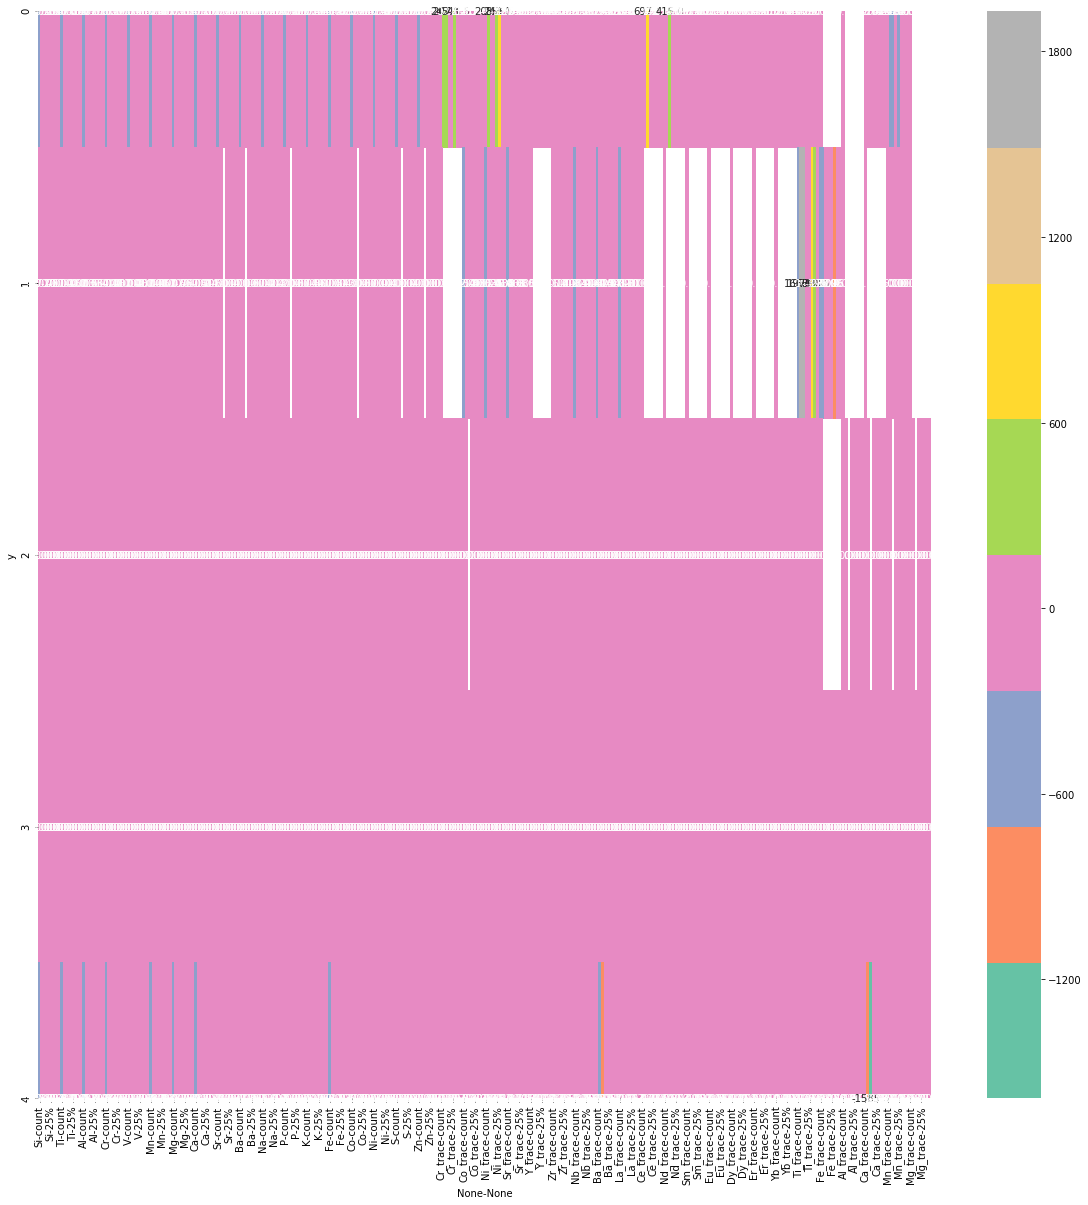

In [123]:
plt.figure(figsize=(20, 20))
sns.heatmap(Stat_diff, cmap='Set2', annot=True, fmt=".1f")

# Statistical Infor for trains before and after single-resampling

In [124]:
X_o1_train, y_o1_train = oversample.fit_resample(X_train, y_train)

In [125]:
X_o1_df=X_o1_train.copy()
X_o1_df['y']=y_o1_train.tolist()

In [126]:
Median1_diff=X_df.groupby('y').median()-X_o1_df.groupby('y').median()
Median1_diff.reset_index(inplace = True)
Median1_diff

,y,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace
0,0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
1,1,0.0,-0.023972,0.0,-0.013684,-0.003399,-0.007744,0.0,-0.078573,0.0,0.0,-0.185475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,-35.0,-66.5,NaN,0.0,1.0,-23.0,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,741.0,-1076.0,NaN,NaN,0.0,NaN
2,2,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
3,3,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


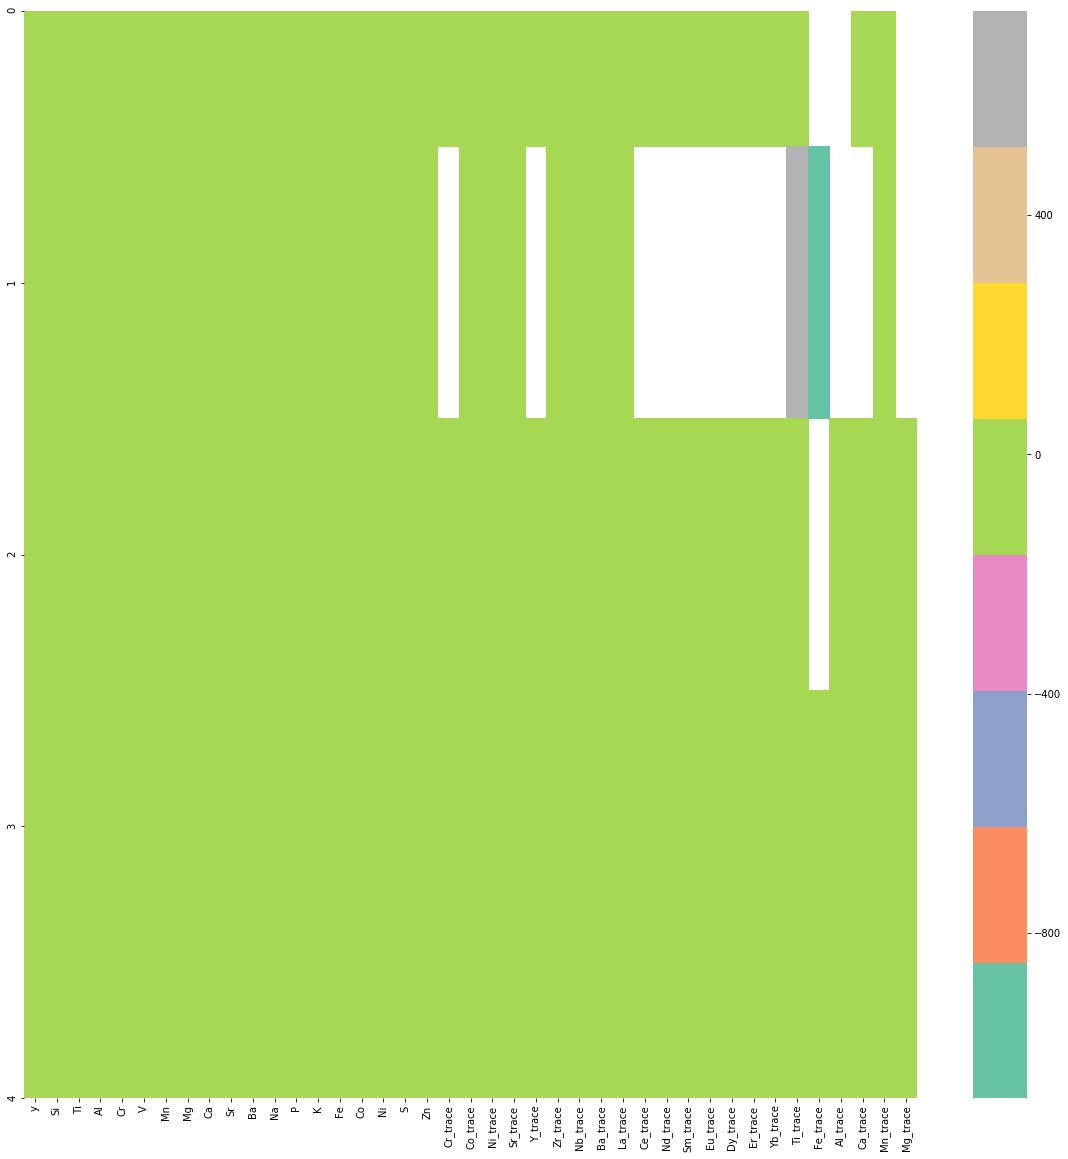

In [127]:
plt.figure(figsize=(20, 20))
sns.heatmap(Median1_diff, cmap='Set2')

In [128]:
Stat1_diff=X_df.groupby('y').describe()-X_o1_df.groupby('y').describe()
Stat1_diff.reset_index(inplace = True)
Stat1_diff

y    Si                                                         Ti  \
     count      mean      std  min      25%  50%       75%  max count   
0  0   0.0  0.000000  0.00000  0.0  0.00000  0.0  0.000000  0.0   0.0   
1  1 -67.0  0.122159  0.72423  0.0 -2.05348  0.0 -0.070005  0.0 -67.0   
2  2   0.0  0.000000  0.00000  0.0  0.00000  0.0  0.000000  0.0   0.0   
3  3   0.0  0.000000  0.00000  0.0  0.00000  0.0  0.000000  0.0   0.0   
4  4   0.0  0.000000  0.00000  0.0  0.00000  0.0  0.000000  0.0   0.0   

                                                               Al           \
       mean      std  min      25%       50%       75%  max count     mean   
0  0.000000  0.00000  0.0  0.00000  0.000000  0.000000  0.0   0.0  0.00000   
1  0.014626  0.05321  0.0 -0.00899 -0.023972 -0.011986  0.0 -67.0  0.33127   
2  0.000000  0.00000  0.0  0.00000  0.000000  0.000000  0.0   0.0  0.00000   
3  0.000000  0.00000  0.0  0.00000  0.000000  0.000000  0.0   0.0  0.00000   
4  0.000000  0.00000  0.0  0.00000  0.000000  0.000000  0.0   0.0  0.00000   

                                                 Cr                           \
        std  min       25%  50%      75%  max count      mean       std  min   
0  0.000000  0.0  0.000000  0.0  0.00000  0.0   0.0  0.000000  0.000000  0.0   
1  0.518675  0.0  0.251465  0.0  0.42352  0.0 -67.0 -0.055932 -0.044533  0.0   
2  0.000000  0.0  0.000000  0.0  0.00000  0.0   0.0  0.000000  0.000000  0.0   
3  0.000000  0.0  0.000000  0.0  0.00000  0.0   0.0  0.000000  0.000000  0.0   
4  0.000000  0.0  0.000000  0.0  0.00000  0.0   0.0  0.000000  0.000000  0.0   

                                    V                                          \
   25%       50%       75%  max count      mean       std  min  25%       50%   
0  0.0  0.000000  0.000000  0.0   0.0  0.000000  0.000000  0.0  0.0  0.000000   
1  0.0 -0.013684 -0.003421  0.0 -67.0 -0.000301  0.002493  0.0  0.0 -0.003399   
2  0.0  0.000000  0.000000  0.0   0.0  0.000000  0.000000  0.0  0.0  0.000000   
3  0.0  0.000000  0.000000  0.0   0.0  0.000000  0.000000  0.0  0.0  0.000000   
4  0.0  0.000000  0.000000  0.0   0.0  0.000000  0.000000  0.0  0.0  0.000000   

                    Mn                                                         \
        75%  max count      mean       std  min       25%       50%       75%   
0  0.000000  0.0   0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
1 -0.006797  0.0 -67.0  0.001047  0.014311  0.0 -0.011616 -0.007744 -0.046464   
2  0.000000  0.0   0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
3  0.000000  0.0   0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
4  0.000000  0.0   0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

          Mg                                                   Ca            \
   max count      mean       std  min   25%  50%   75%  max count      mean   
0  0.0   0.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   0.0  0.000000   
1  0.0 -67.0 -0.580531  0.675747  0.0 -2.31  0.0 -1.08  0.0 -67.0 -0.460374   
2  0.0   0.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   0.0  0.000000   
3  0.0   0.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   0.0  0.000000   
4  0.0   0.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0   0.0  0.000000   

                                                     Sr                      \
       std  min       25%       50%      75%  max count mean  std  min  25%   
0  0.00000  0.0  0.000000  0.000000  0.00000  0.0   0.0  0.0  0.0  0.0  0.0   
1 -0.17314  0.0  0.001786 -0.078573 -0.57144  0.0  -4.0  0.0  NaN  0.0  0.0   
2  0.00000  0.0  0.000000  0.000000  0.00000  0.0   0.0  0.0  0.0  0.0  0.0   
3  0.00000  0.0  0.000000  0.000000  0.00000  0.0   0.0  0.0  0.0  0.0  0.0   
4  0.00000  0.0  0.000000  0.000000  0.00000  0.0   0.0  0.0  0.0  0.0  0.0   

                    Ba                                       Na            \
   50%  75%  max count mean  std  min  25%  50%  75%  max coun

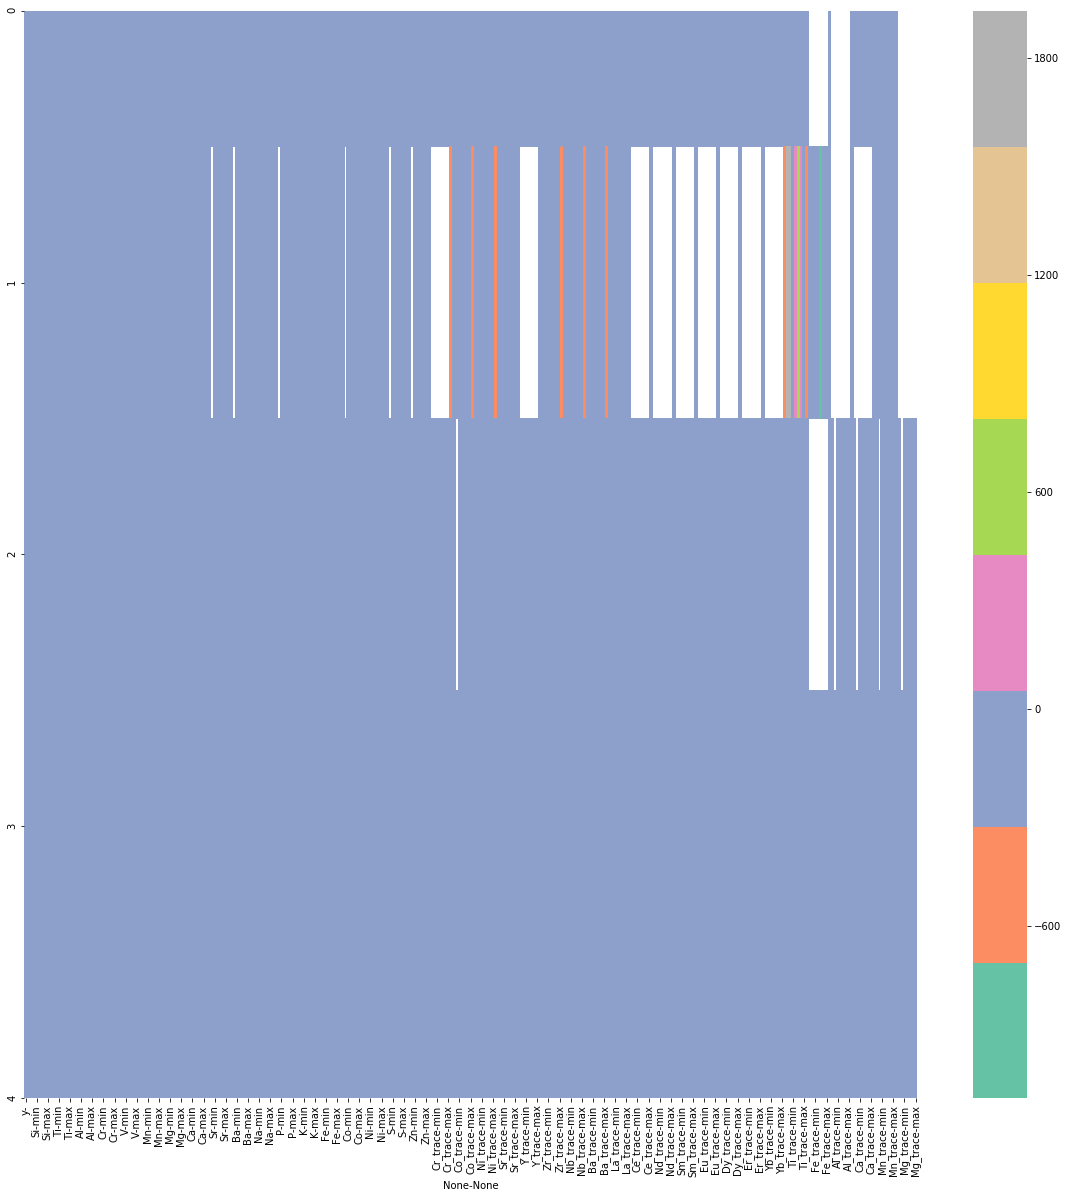

In [129]:
plt.figure(figsize=(20, 20))
sns.heatmap(Stat1_diff, cmap='Set2')

# Statistical Infor for trains before and after triple-resampling

In [130]:
X_o3_train, y_o3_train = oversample.fit_resample(X_train, y_train)

In [131]:
X_o3_train, y_o3_train = oversample.fit_resample(X_o3_train, y_o3_train)

In [132]:
X_o3_train, y_o3_train = oversample.fit_resample(X_o3_train, y_o3_train)

In [133]:
X_o3_df=X_o3_train.copy()
X_o3_df['y']=y_o3_train.tolist()

In [134]:
Median3_diff=X_df.groupby('y').median()-X_o3_df.groupby('y').median()
Median3_diff.reset_index(inplace = True)
Median3_diff

,y,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace
0,0,0.592671,0.000000,0.060881,0.006842,0.000000,0.000000,0.066,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,548.5,12.000,855.5,-0.10,0.00,-1.1,0.000,-0.89,-0.035,-0.53,0.00,0.000,0.0,0.0,0.08,0.00,0.00,NaN,NaN,6.8,-9.5,NaN
1,1,0.000000,-0.023972,0.000000,-0.013684,-0.003399,-0.007744,0.000,-0.078573,0.0,0.0,-0.185475,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,NaN,0.000,-35.0,-66.50,NaN,0.0,1.000,-23.00,-3.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,741.00,-1076.0,NaN,NaN,0.0,NaN
2,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.00,0.0,0.000,0.00,0.000,0.00,0.00,0.000,0.0,0.0,0.00,0.00,0.00,NaN,0.0,0.0,0.0,0.0
3,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.00,0.0,0.000,0.00,0.000,0.00,0.00,0.000,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
4,4,-0.018667,-0.008993,-0.352051,0.000000,0.000000,0.000000,-0.105,-0.964305,0.0,0.0,-0.007419,0.0,0.0,-0.116667,0.0,0.0,0.0,0.0,-25.5,-0.005,-32.0,-0.44,0.21,1.6,-0.455,-0.10,-0.205,0.00,0.09,-0.015,0.0,0.1,0.00,-0.05,0.02,0.0,0.0,-0.8,0.0,0.0


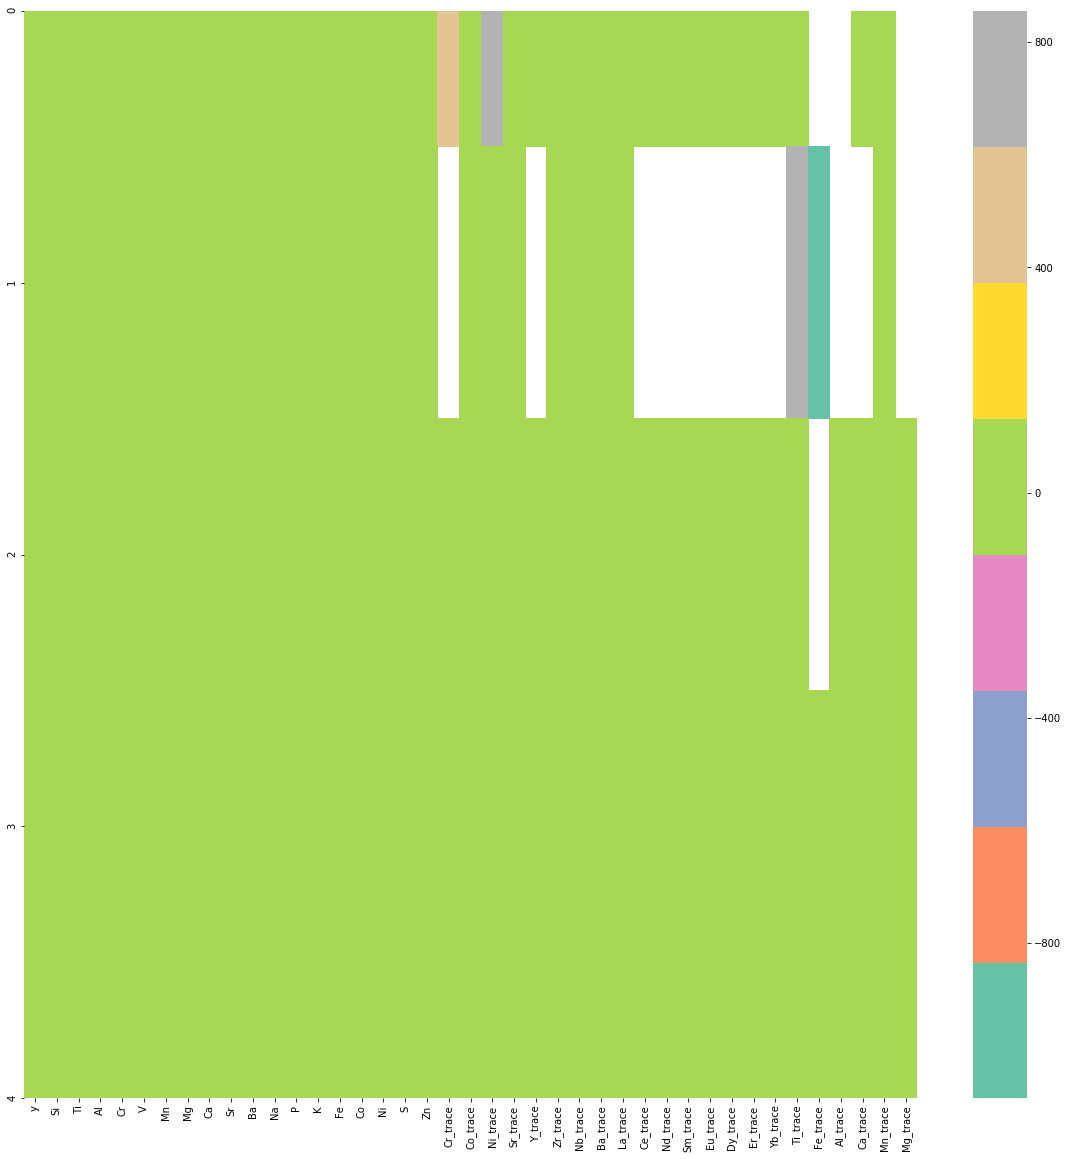

In [135]:
plt.figure(figsize=(20, 20))
sns.heatmap(Median3_diff, cmap='Set2')

In [136]:
Stat3_diff=X_df.groupby('y').describe()-X_o3_df.groupby('y').describe()

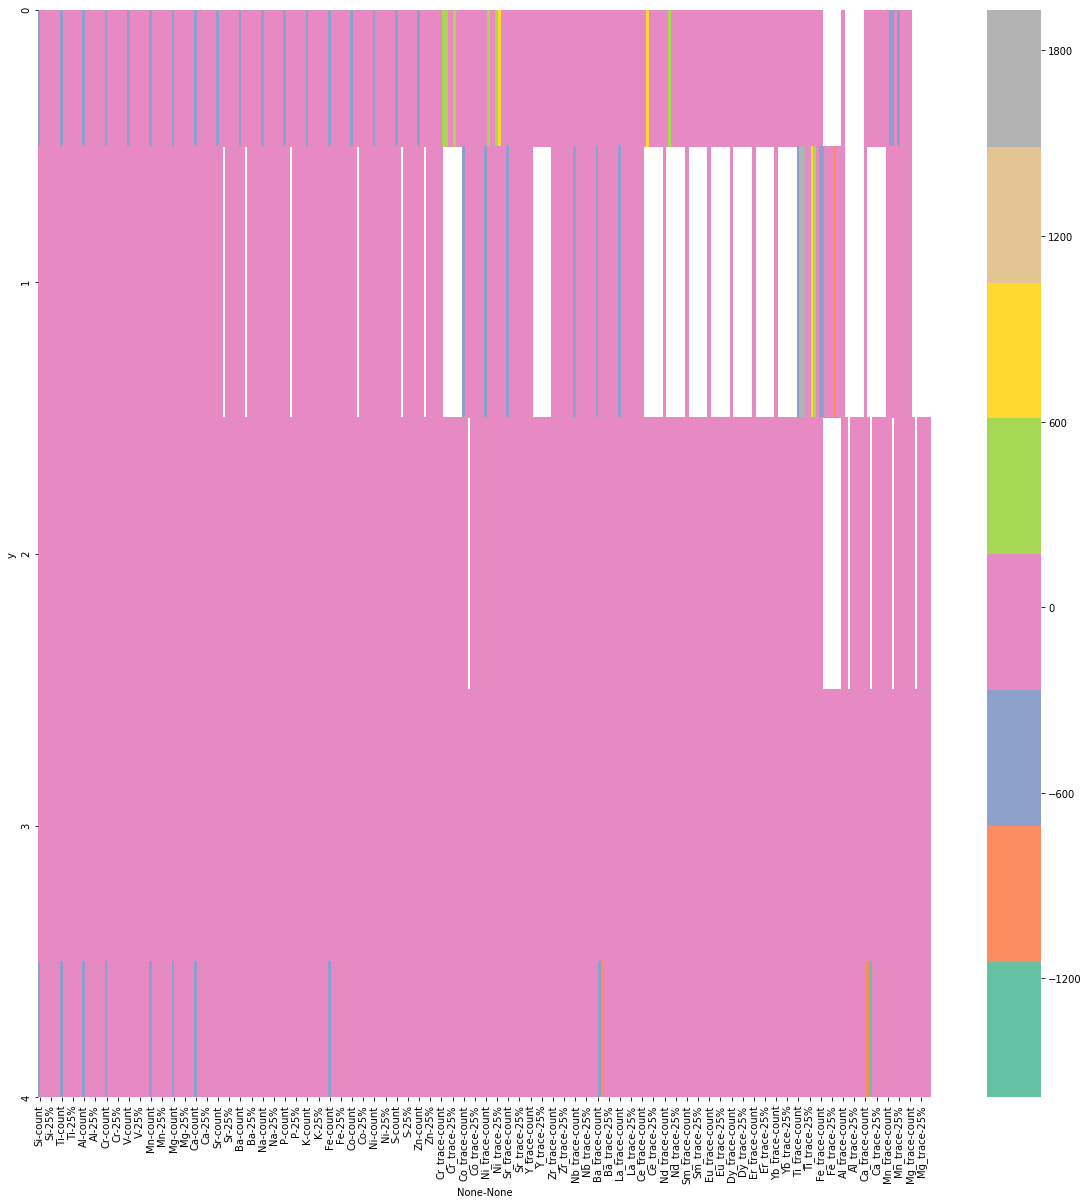

In [137]:
plt.figure(figsize=(20, 20))
sns.heatmap(Stat3_diff, cmap='Set2')

In [138]:
Stat3_diff.reset_index(inplace = True)
Stat3_diff

y     Si                                                              \
      count      mean       std  min       25%       50%       75%  max   
0  0 -387.0  0.225764  0.050670  0.0  0.004667  0.592671  0.016333  0.0   
1  1  -67.0  0.122159  0.724230  0.0 -2.053480  0.000000 -0.070005  0.0   
2  2    0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0   
3  3    0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0   
4  4 -268.0 -0.522727  0.024222  0.0 -0.128339 -0.018667 -0.081672  0.0   

      Ti                                                                Al  \
   count      mean       std  min      25%       50%       75%  max  count   
0 -387.0  0.014582 -0.023168  0.0  0.00000  0.000000  0.000000  0.0 -387.0   
1  -67.0  0.014626  0.053210  0.0 -0.00899 -0.023972 -0.011986  0.0  -67.0   
2    0.0  0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.0    0.0   
3    0.0  0.000000  0.000000  0.0  0.00000  0.000000  0.000000  0.0    0.0   
4 -268.0 -0.015300 -0.005073  0.0  0.00000 -0.008993 -0.035964  0.0 -268.0   

                                                                  Cr  \
       mean       std  min       25%       50%       75%  max  count   
0 -0.108201 -0.341832  0.0  0.000000  0.060881  0.034411  0.0 -387.0   
1  0.331270  0.518675  0.0  0.251465  0.000000  0.423520  0.0  -67.0   
2  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0    0.0   
3  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0    0.0   
4 -0.091022  0.271913  0.0  0.000000 -0.352051 -0.333522  0.0 -268.0   

                                                              V                \
       mean       std  min  25%       50%       75%  max  count          mean   
0  0.263300  0.142149  0.0  0.0  0.006842  0.290785  0.0 -363.0  7.640039e-04   
1 -0.055932 -0.044533  0.0  0.0 -0.013684 -0.003421  0.0  -67.0 -3.010215e-04   
2  0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.0    0.0  0.000000e+00   
3  0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.0    0.0  0.000000e+00   
4  0.332833  0.523930  0.0  0.0  0.000000  0.006842  0.0 -237.0  3.077464e-10   

                                                       Mn                      \
            std  min  25%       50%       75%  max  count      mean       std   
0  5.406230e-04  0.0  0.0  0.000000 -0.003398  0.0 -387.0 -0.010028  0.008328   
1  2.493449e-03  0.0  0.0 -0.003399 -0.006797  0.0  -67.0  0.001047  0.014311   
2  0.000000e+00  0.0  0.0  0.000000  0.000000  0.0    0.0  0.000000  0.000000   
3  0.000000e+00  0.0  0.0  0.000000  0.000000  0.0    0.0  0.000000  0.000000   
4  1.674962e-09  0.0  0.0  0.000000  0.000000  0.0 -268.0 -0.027135 -0.139793   

                                              Mg                           \
   min       25%       50%       75%  max  count      mean       std  min   
0  0.0  0.000000  0.000000 -0.005808  0.0 -387.0  0.298016  0.083417  0.0   
1  0.0 -0.011616 -0.007744 -0.046464  0.0  -67.0 -0.580531  0.675747  0.0   
2  0.0  0.000000  0.000000  0.000000  0.0    0.0  0.000000  0.000000  0.0   
3  0.0  0.000000  0.000000  0.000000  0.0    0.0  0.000000  0.000000  0.0   
4  0.0  0.000000  0.000000 -0.001936  0.0 -268.0  0.047692  0.162496  0.0   

                                 Ca                                     \
     25%    50%     75%  max  count      mean       std  min       25%   
0  0.072  0.066  0.4485  0.0 -387.0  0.088067  0.063713  0.0  0.000000   
1 -2.310  0.000 -1.0800  0.0  -67.0 -0.460374 -0.173140  0.0  0.001786   
2  0.000  0.000  0.0000  0.0    0.0  0.000000  0.000000  0.0  0.000000   
3  0.000  0.000  0.0000  0.0    0.0  0.000000  0.000000  0.0  0.000000   
4 -0.315 -0.105 -0.0420  0.0 -268.0 -0.076325  0.870262  0.0  0.000000   

                               Sr                                              \
        50%       75%  max  count      mean      std  min  25%  50%  75%  max   
0  0.000000  0.003572  0.0 -363.0  0.000000  0.00000  0.0  0.0  0.0 

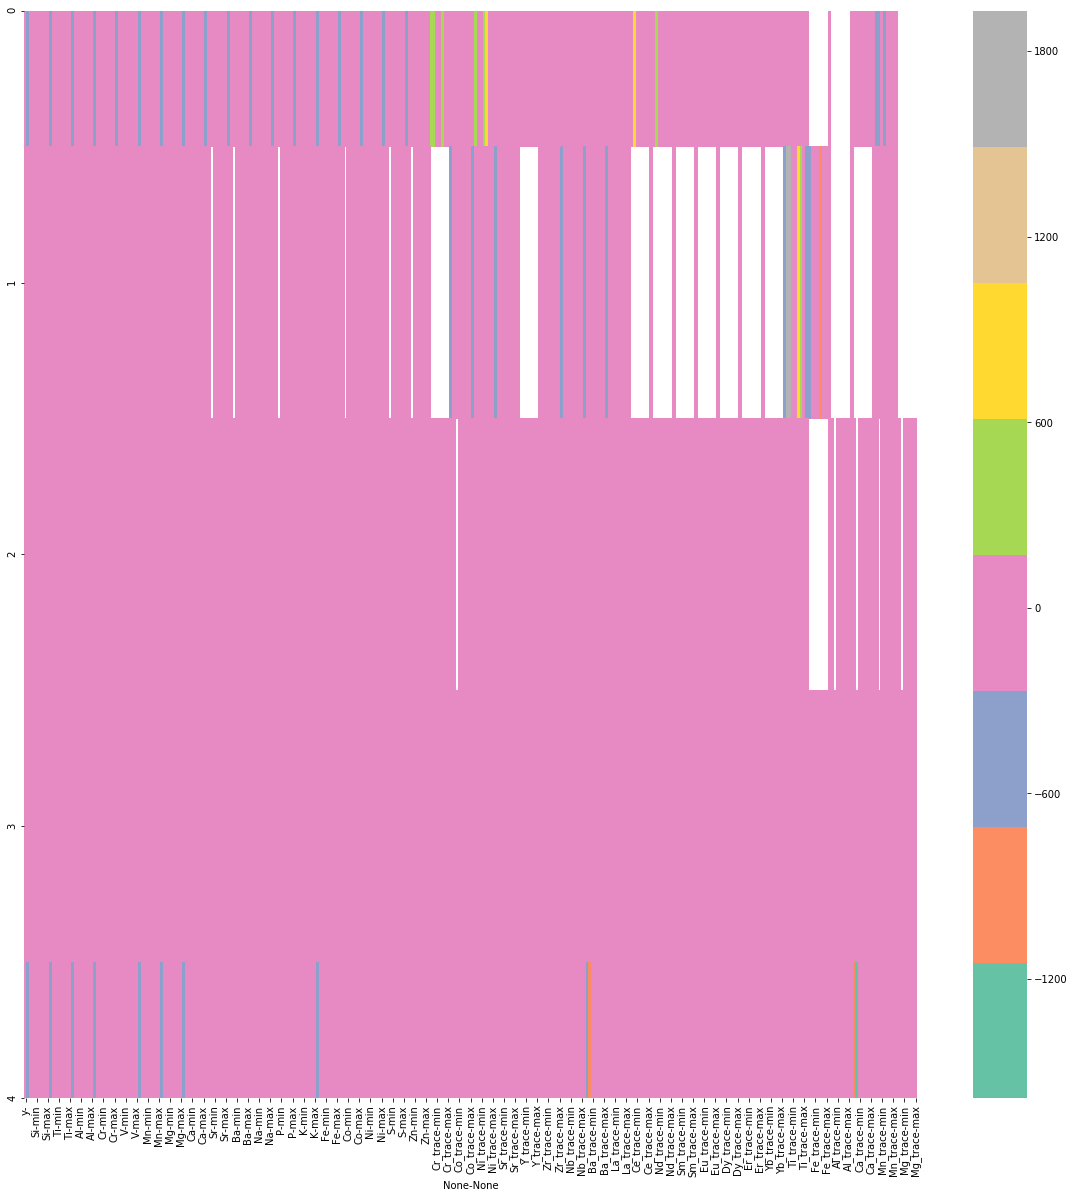

In [139]:
plt.figure(figsize=(20, 20))
sns.heatmap(Stat3_diff, cmap='Set2')

In [140]:
#Stat3_diff.unstack()
#Stat3_diff

In [141]:
# 1. R-liuben  #2. uknown data-test #3. Light GBM

# Predict Unknown

## *Assume all samples are from Top 5 Craton*

In [146]:
df_pre = pd.read_csv("Diamind_XZ_20201216_UnKnown.csv")
df_pre.head()

,Unnamed: 0,craton,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace,NAs
0,1,Amazonia,0.000000,30.353616,0.008470,0.027368,0.0,0.363968,0.270,0.017143,0.0,0.0,0.023741,0.0,0.026553,37.022328,0.0,0.037718,0.0,0.0,136.0,79.0,31.0,0.2,0.300,27.4,335.0,4.00,0.600,2.100,0.60,0.192,0.0760,0.1472,0.224,0.1000,NaN,NaN,NaN,55.640,2706.0,NaN,48
1,2,Amazonia,0.014000,32.007960,0.047646,0.027368,0.0,0.394944,0.342,0.028572,0.0,0.0,0.023741,0.0,0.033192,33.281206,0.0,0.094296,0.0,0.0,260.0,56.0,181.0,0.4,0.800,56.6,227.0,3.20,0.700,2.400,2.50,0.312,0.1112,0.1288,0.392,0.3280,NaN,NaN,NaN,97.424,3251.0,NaN,48
2,3,Amazonia,0.070000,0.689310,1.138210,2.155230,0.0,0.201344,29.868,0.017143,0.0,0.0,0.023741,0.0,0.026553,36.368993,0.0,0.809374,0.0,0.0,4172.0,429.0,6375.0,1.6,0.144,25.2,4.8,0.56,0.096,0.056,0.32,0.400,0.1600,0.3200,0.640,0.3200,NaN,NaN,NaN,156.800,1887.0,NaN,48
3,4,Amazonia,0.004667,30.101868,0.008470,0.027368,0.0,0.565312,0.072,0.021429,0.0,0.0,0.023741,0.0,0.026553,35.941214,0.0,0.037718,0.0,0.0,2944.0,155.0,790.0,0.2,0.300,348.7,646.0,2.30,0.500,1.900,0.70,0.300,0.0688,0.1864,0.248,0.1544,NaN,NaN,NaN,71.488,2397.0,NaN,48
4,5,Amazonia,0.028000,32.463504,0.068822,0.027368,0.0,0.325248,0.300,0.017143,0.0,0.0,0.023741,0.0,0.026553,31.290089,0.0,0.055006,0.0,0.0,153.0,53.0,13.0,0.3,0.500,68.7,205.0,8.80,0.800,2.900,0.70,0.100,0.0000,0.1000,0.256,0.5000,NaN,NaN,NaN,67.304,2898.0,NaN,48


In [147]:
uk = df_pre.copy()
uk.shape

(2162, 43)

In [148]:
uk.columns #Keep NA to see NA's impact

Index(['Unnamed: 0', 'craton', 'Si', 'Ti', 'Al', 'Cr', 'V', 'Mn', 'Mg', 'Ca',
       'Sr', 'Ba', 'Na', 'P', 'K', 'Fe', 'Co', 'Ni', 'S', 'Zn', 'Cr_trace',
       'Co_trace', 'Ni_trace', 'Sr_trace', 'Y_trace', 'Zr_trace', 'Nb_trace',
       'Ba_trace', 'La_trace', 'Ce_trace', 'Nd_trace', 'Sm_trace', 'Eu_trace',
       'Dy_trace', 'Er_trace', 'Yb_trace', 'Ti_trace', 'Fe_trace', 'Al_trace',
       'Ca_trace', 'Mn_trace', 'Mg_trace', 'NAs'],
      dtype='object')

In [149]:
uk.drop(uk.columns[uk.isna().mean() == 1], axis=1, inplace=True)  # Remove columns that 100% missing 
uk.shape

(2162, 43)

In [150]:
uk=uk.drop(uk.columns[0], axis=1)

In [151]:
uk=uk.drop('NAs', axis=1)

In [152]:
uk.head()

,craton,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace
0,Amazonia,0.000000,30.353616,0.008470,0.027368,0.0,0.363968,0.270,0.017143,0.0,0.0,0.023741,0.0,0.026553,37.022328,0.0,0.037718,0.0,0.0,136.0,79.0,31.0,0.2,0.300,27.4,335.0,4.00,0.600,2.100,0.60,0.192,0.0760,0.1472,0.224,0.1000,NaN,NaN,NaN,55.640,2706.0,NaN
1,Amazonia,0.014000,32.007960,0.047646,0.027368,0.0,0.394944,0.342,0.028572,0.0,0.0,0.023741,0.0,0.033192,33.281206,0.0,0.094296,0.0,0.0,260.0,56.0,181.0,0.4,0.800,56.6,227.0,3.20,0.700,2.400,2.50,0.312,0.1112,0.1288,0.392,0.3280,NaN,NaN,NaN,97.424,3251.0,NaN
2,Amazonia,0.070000,0.689310,1.138210,2.155230,0.0,0.201344,29.868,0.017143,0.0,0.0,0.023741,0.0,0.026553,36.368993,0.0,0.809374,0.0,0.0,4172.0,429.0,6375.0,1.6,0.144,25.2,4.8,0.56,0.096,0.056,0.32,0.400,0.1600,0.3200,0.640,0.3200,NaN,NaN,NaN,156.800,1887.0,NaN
3,Amazonia,0.004667,30.101868,0.008470,0.027368,0.0,0.565312,0.072,0.021429,0.0,0.0,0.023741,0.0,0.026553,35.941214,0.0,0.037718,0.0,0.0,2944.0,155.0,790.0,0.2,0.300,348.7,646.0,2.30,0.500,1.900,0.70,0.300,0.0688,0.1864,0.248,0.1544,NaN,NaN,NaN,71.488,2397.0,NaN
4,Amazonia,0.028000,32.463504,0.068822,0.027368,0.0,0.325248,0.300,0.017143,0.0,0.0,0.023741,0.0,0.026553,31.290089,0.0,0.055006,0.0,0.0,153.0,53.0,13.0,0.3,0.500,68.7,205.0,8.80,0.800,2.900,0.70,0.100,0.0000,0.1000,0.256,0.5000,NaN,NaN,NaN,67.304,2898.0,NaN


In [155]:
uk.craton.unique()

array(['Amazonia', 'Siberia', 'Slave', 'Unknown', 'Superior', 'Kaapvaal',
       'Congo', 'West Africa', 'Wyoming', 'Alluvial', 'Guyana',
       'Kalahari', 'Zimbabwe', 'East European', 'Buffalo Head Terrane',
       'Pohorje', 'Gawler', 'Tarim'], dtype=object)

In [162]:
preds=uk.loc[(uk['craton']=='Unknown')].drop(['craton'], axis=1)

In [163]:
preds.head()

,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,2.0,12.0,51.0,520.0,48.0,68.0,21.0,2.0,0.4,0.5,0.19,0.14,390.0,NaN,NaN,4000.0,NaN,NaN
334,18.666800,1.078920e+00,5.029300,0.000000e+00,0.0,9.292800e-02,3.240,15.571740,0.0,0.0,2.077320e+00,0.760077,4.978740e+00,0.000000,0.0,0.000000,0.0,0.0,1111.0,NaN,NaN,4389.0,165.0,967.0,413.0,6658.0,990.0,2067.0,813.0,116.0,32.0,63.0,49.00,26.00,NaN,NaN,NaN,NaN,NaN,NaN
501,19.362138,5.994000e-07,0.121762,6.842000e-07,NaN,7.744000e-07,30.066,0.171432,NaN,NaN,7.419000e-07,NaN,8.301000e-07,4.791125,NaN,0.227882,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,19.632807,5.994000e-07,0.079410,6.842000e-07,NaN,7.744000e-07,30.252,0.135717,NaN,NaN,7.419000e-07,NaN,8.301000e-07,5.234459,NaN,0.282888,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,19.628140,5.994000e-07,9.110974,6.034644e+00,NaN,2.168320e-01,12.798,2.757198,NaN,NaN,7.419000e-07,NaN,8.301000e-07,5.016681,NaN,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
preds.shape

(18, 40)

In [164]:
preds.isnull().sum().sum() /(preds.shape[0]* preds.shape[1])

0.5319444444444444

In [165]:
uk_preds = xgb_best.predict(preds)

In [166]:
uk_preds

array([4, 2, 4, 1, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 4, 3, 4])

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

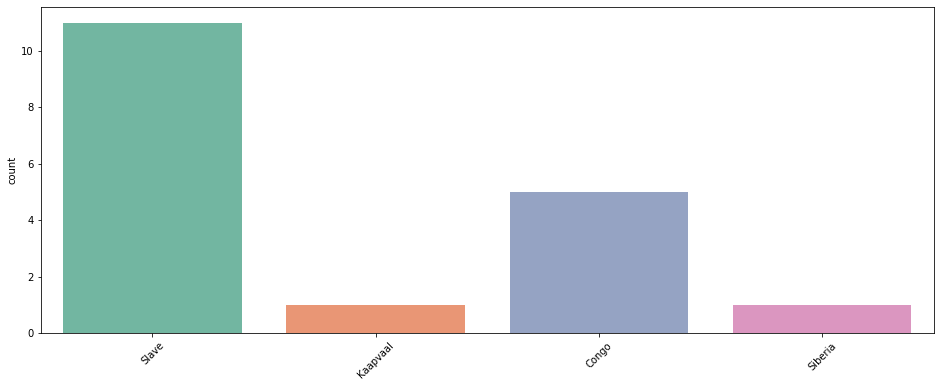

In [184]:
plt.figure(figsize=(16, 6))
sns.countplot(le.inverse_transform(uk_preds), palette="Set2")
plt.xticks(rotation=45)